## Data Cleaning & EDA

### Problem Statement

Historically, stray asteroids and asteroid fragments have collided with Earth, "playing a major role in altering the geological history of the planet and in the evolution of life on Earth." [(NASA)](https://solarsystem.nasa.gov/asteroids-comets-and-meteors/asteroids/in-depth/#many_shapes_and_sizes_otp) For this reason, scientists "continuously monitor Earth-crossing asteroids, whose paths intersect Earth's orbit, and near-Earth asteroids that approach Earth's orbital distance to within about 45 million kilometers (28 million miles) and may pose an impact danger. Radar is a valuable tool in detecting and monitoring potential impact hazards. By reflecting transmitted signals off objects, images and other information can be derived from the echoes. Scientists can learn a great deal about an asteroid's orbit, rotation, size, shape, and metal concentration." [(NASA)](https://solarsystem.nasa.gov/asteroids-comets-and-meteors/asteroids/in-depth/#many_shapes_and_sizes_otp)

Considering the possibility of an asteroid colliding into Earth, what characteristics make an asteroid hazardous? Specifically, what are an asteroid's orbital characteristics and physical characteristics and which ones have a greater influence on whether or not an asteroid is hazardous? 

### Background Info from NASA
**Near-Earth Objects (NEOs)**
>"Near-Earth Objects (NEOs) are comets and asteroids that have been nudged by the gravitational attraction of nearby planets into orbits that allow them to enter the Earth’s neighborhood. Composed mostly of water ice with embedded dust particles, comets originally formed in the cold outer planetary system while most of the rocky asteroids formed in the warmer inner solar system between the orbits of Mars and Jupiter. The scientific interest in comets and asteroids is due largely to their status as the relatively unchanged remnant debris from the solar system formation process some 4.6 billion years ago...[T]oday’s asteroids are the bits and pieces left over from the initial agglomeration of the inner planets that include Mercury, Venus, Earth, and Mars." [[source]](https://cneos.jpl.nasa.gov/about/basics.html)

**(Near-Earth Asteroids (NEAs)**
>"The vast majority of NEOs are asteroids, referred to as Near-Earth Asteroids (NEAs). NEAs are divided into groups (Atira, Aten, Apollo and Amor) according to their perihelion distance (q), aphelion distance (Q) and their semi-major axes (a)." [[source]](https://cneos.jpl.nasa.gov/about/neo_groups.html)

**Potentially Hazardous Asteroids (PHAs)**
>"Potentially Hazardous Asteroids (PHAs) are currently defined based on parameters that measure the asteroid's potential to make threatening close approaches to the Earth. Specifically, all asteroids with an Earth Minimum Orbit Intersection Distance (MOID) of 0.05 au or less and an absolute magnitude (H) of 22.0 or less are considered PHAs."

Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = (15, 9)
plt.rcParams.update({'font.size': 14})
sns.set_style("whitegrid")

### Data Query

Using the [JPL Small-Body Database Search Engine](https://ssd.jpl.nasa.gov/sbdb_query.cgi#x) I was able to generate a custom table of orbital and physical parameters for asteroids. I specified search constraints like
object type/group, orbit class, and object characteristics as well as output fields like orbital parameters.

**Note:** All distance units are in astronomical units unless otherwise specified.

### Import Data

In [4]:
df = pd.read_csv('../data/NASA-asteroids.csv')

In [5]:
df.head()

name neo pha   epoch_cal equinox         e         a         q  \
0     Eros   Y   N  20200531.0   J2000  0.222951  1.458046  1.132973   
1   Albert   Y   N  20200531.0   J2000  0.546558  2.638602  1.196452   
2   Alinda   Y   N  20200531.0   J2000  0.570332  2.473737  1.062886   
3  Ganymed   Y   N  20200531.0   J2000  0.533046  2.664725  1.244303   
4     Amor   Y   N  20200531.0   J2000  0.435285  1.919498  1.083970   

           i           w  ...  t_jup          om          per     per_y  \
0  10.830543  178.882294  ...  4.582  304.299327   643.065402  1.760617   
1  11.567485  156.176338  ...  3.140  183.866950  1565.522356  4.286167   
2   9.393854  350.495585  ...  3.221  110.434218  1421.113276  3.890796   
3  26.677643  132.364631  ...  3.035  215.546826  1588.828164  4.349974   
4  11.876536   26.694797  ...  3.781  171.326998   971.359460  2.659437   

   class    producer   first_obs    last_obs  diameter albedo  
0    AMO    Giorgini  1893-10-29  2019-02-13    16.840  0.250  
1    AMO  Otto Matic  1911-10-04  2020-02-27       NaN    NaN  
2    AMO  Otto Matic  1918-02-03  2019-08-27     4.200  0.310  
3    AMO  Otto Matic  1924-10-23  2019-08-17    37.675  0.238  
4    AMO  Otto Matic  1932-03-12  2020-01-24     1.000    NaN  

[5 rows x 25 columns]

In [6]:
df.shape

(2917, 25)

**Color Theme List**  
I am creating a list of colors to use throughout my notebooks

In [47]:
# Create colors list
c = ['#B275FF', '#757DFF', '#5E3BA8', '#503098', '#41258A', '#251C65']

### Rename Columns
Renaming columns so that they're easier to understand.

In [48]:
# Create column name dictionary to rename columns
column_names = {
    'pha': 'hazardous',
    'e': 'eccentricity_(e)',
    'a': 'semi_major_axis_(a)',
    'q': 'perihelion_dist_(q)',
    'i': 'inclination_(i)',
    'w': 'perihelion_arg_(w)',
    'H': 'abs_magnitude_(H)',
    'ma': 'mean_anomaly',
    'ad': 'aphelion_dist_(Q)',
    'n': 'mean_motion_(n)',
    'moid': 'min_orbit_intersection_dist',
    't_jup': 't_jupiter',
    'per': 'orbital_per_(d)',
    'per_y': 'orbital_per_(y)',
    'om': 'asc_node_long_(deg)',
    'diameter': 'diameter_(km)'
}

# Rename columns
df.rename(columns=column_names, inplace=True)

### Analyze Missing Values

**Drop Missing Values**  

The `name` and `full_name` columns are neither quantitative nor qualitative features for the model so I'm deciding to drop them. The column `producer` tells who first observed the asteroid, and although it is important, it will not be necessary for the model. The column `equinox` contains the same value for every observation so it is also not relevant to the model. When it comes to `diameter` and `albedo`, more than 60% of the observations are missing therefore, I am dropping the columns altogether. Lastly, I will drop the `orbital_per_(d)` because there is a column containing the same information in years: `orbital_per_(y)`.

In [49]:
# Check if there are null values
df.isnull().sum()

# Drop name column because it's a repitition of full_name column but with most values missing
# Drop producer because it's unbalanced and won't contribute to the model 
# Drop equinox because all observations have the same equinox 'J2000'
df.drop(columns=['name', 'producer', 'equinox'], inplace=True)

# 5442/df.shape[0]
df.drop(columns=['diameter_(km)', 'albedo'], inplace=True)

# Drop unecessary column
# df.drop(columns=['full_name'], inplace=True)

# Duplicate column for orbital_per_(y)
df.drop(columns='orbital_per_(d)', inplace=True)

# Verify there are no more missing values
df.isnull().sum()

neo                            0
hazardous                      0
epoch_cal                      0
eccentricity_(e)               0
semi_major_axis_(a)            0
perihelion_dist_(q)            0
inclination_(i)                0
perihelion_arg_(w)             0
abs_magnitude_(H)              0
mean_anomaly                   0
aphelion_dist_(Q)              0
mean_motion_(n)                0
min_orbit_intersection_dist    0
t_jupiter                      0
asc_node_long_(deg)            0
orbital_per_(y)                0
class                          0
first_obs                      0
last_obs                       0
dtype: int64

### Data Types & Feature Engineering

I am analyzing datatypes and converting inaccurate ones or 'dummifying' categorical ones. There are two date columns that appear as objects so I am converting those to pandas datetime types. `Neo` is also listed as an object type so I will assign 1 to observations that are NEO's and 1 to those that are not NEO's. NEO's (Near Earth Objects), in terms of orbital elements, are asteroids with perihelion distance less than 1.3 au [[source]](https://cneos.jpl.nasa.gov/about/neo_groups.html). The target label: `hazardous` is also listed as an object type, so I am assigning a 1 to non-hazardous asteroids and a 1 to potentially hazardous asteroids.

In [50]:
# Inspect the data types
df.dtypes

# Convert datetime columns to pandas datetime data types 
df['first_obs'] = pd.to_datetime(df['first_obs'])
df['last_obs'] = pd.to_datetime(df['last_obs'])

# Check that it worked
df.dtypes

# Assign target labels (hazardous)
# Assign NEO labels
df['hazardous'] = df['hazardous'].map({'Y': 1, 'N': 0})
df['neo'] = df['neo'].map({'Y': 1, 'N': 0})


# Check the balance of neo
df['neo'].value_counts(normalize=True)

# Check the balance of hazardous
df['hazardous'].value_counts()

0    2152
1     765
Name: hazardous, dtype: int64

**Dummying Categorical Features**

The asteroid orbital classes in the data are IEO (Atiras), ATE (Aten), AMO (Amor), and APO (Apollo). All four orbital classes contain hazardous and non-hazardous asteroid observations. IEOs are NEAs "whose orbits are contained entirely with the orbit of the Earth (named after asteroid 163693 Atira)." IEO is the class with the least observations for both hazardous and non-hazardous asteroids. ATEs are "Earth-crossing NEAs with semi-major axes smaller than Earth's (named after asteroid 2062 Aten)." AMOs are "Earth-approaching NEAs with orbits exterior to Earth's but interior to Mars' (named after asteroid 1221 Amor)." APOs are "Earth-crossing NEAs with semi-major axes larger than Earth's (named after asteroid 1862 Apollo)." While the majority of the observations are from the AMO class, only 3% of those are considered hazardous asteroids.
[[Source]](https://cneos.jpl.nasa.gov/about/neo_groups.html)

Check orbital class counts by hazardous status. 

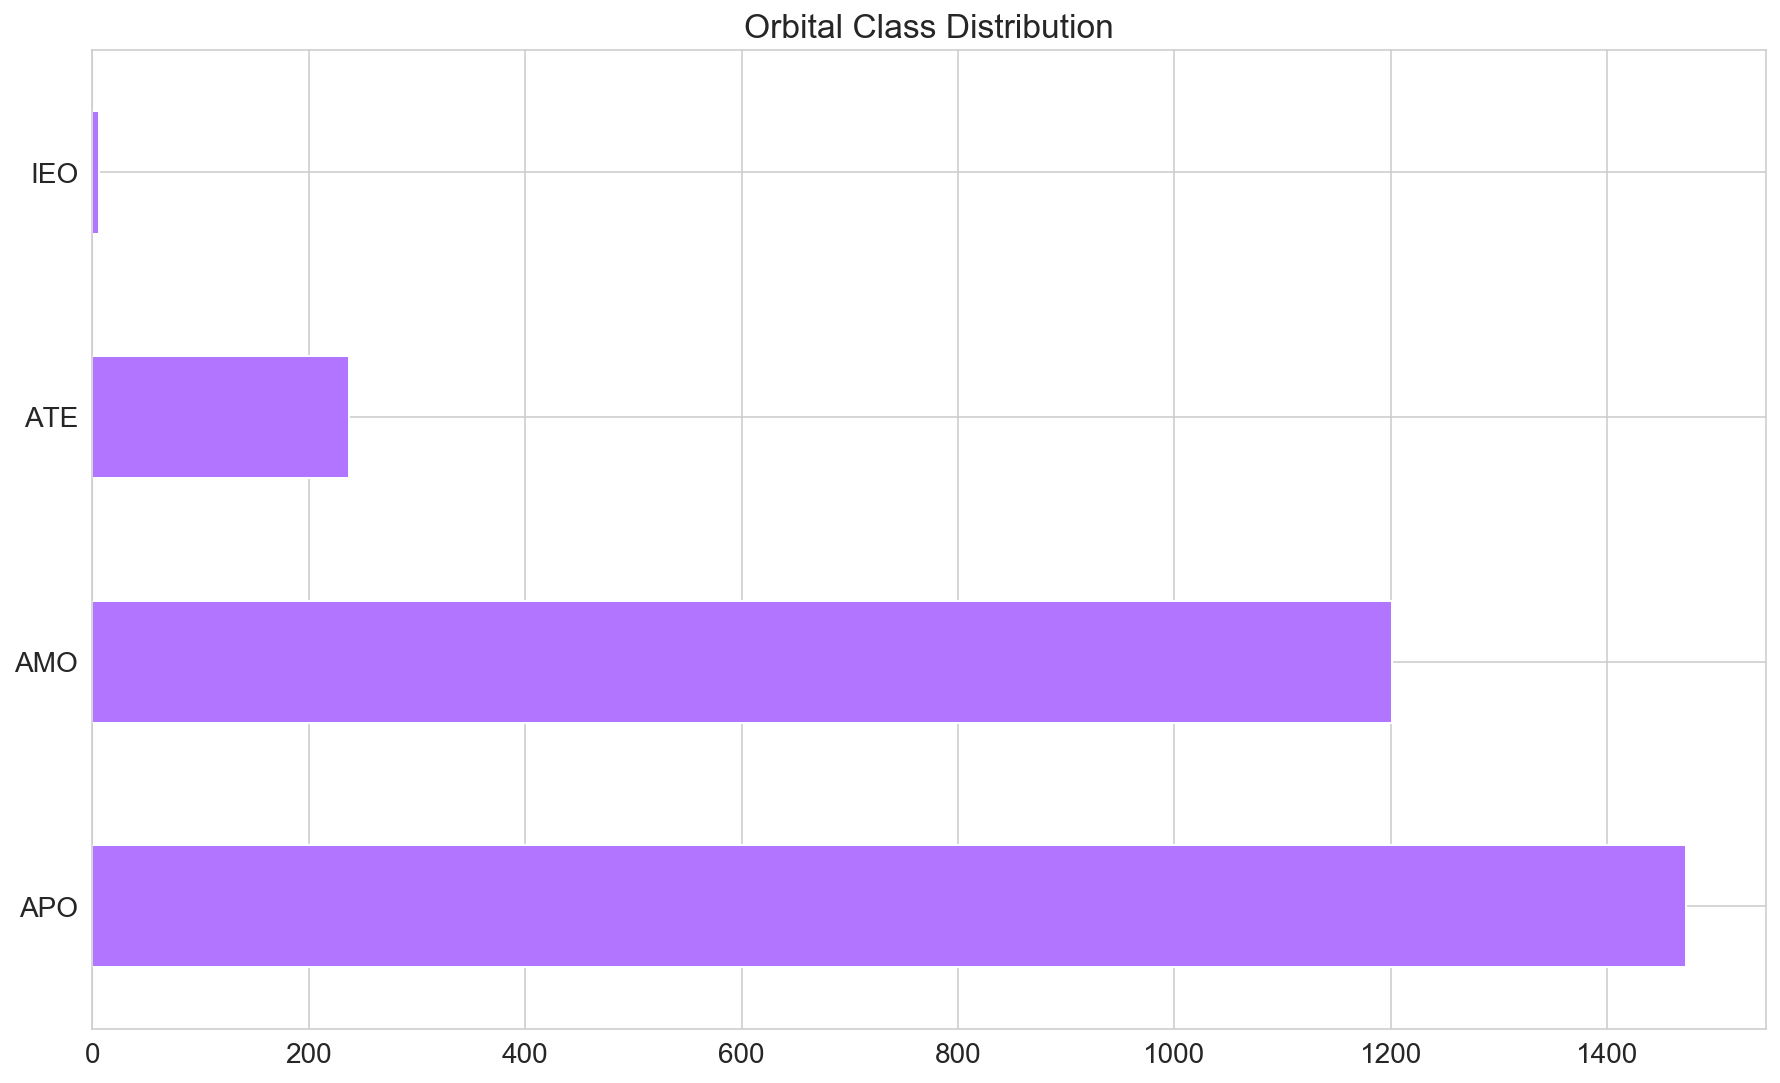

In [51]:
# Check the balance of the asteroid orbit classes
df['class'].value_counts(normalize=True)

# Visual representation of orbital class distribution
df.sort_values(by='hazardous')['class'].value_counts().plot(kind='barh', color=c[0])
plt.title('Orbital Class Distribution')
plt.savefig('../images/asteroid_orbit_class_dist.png');

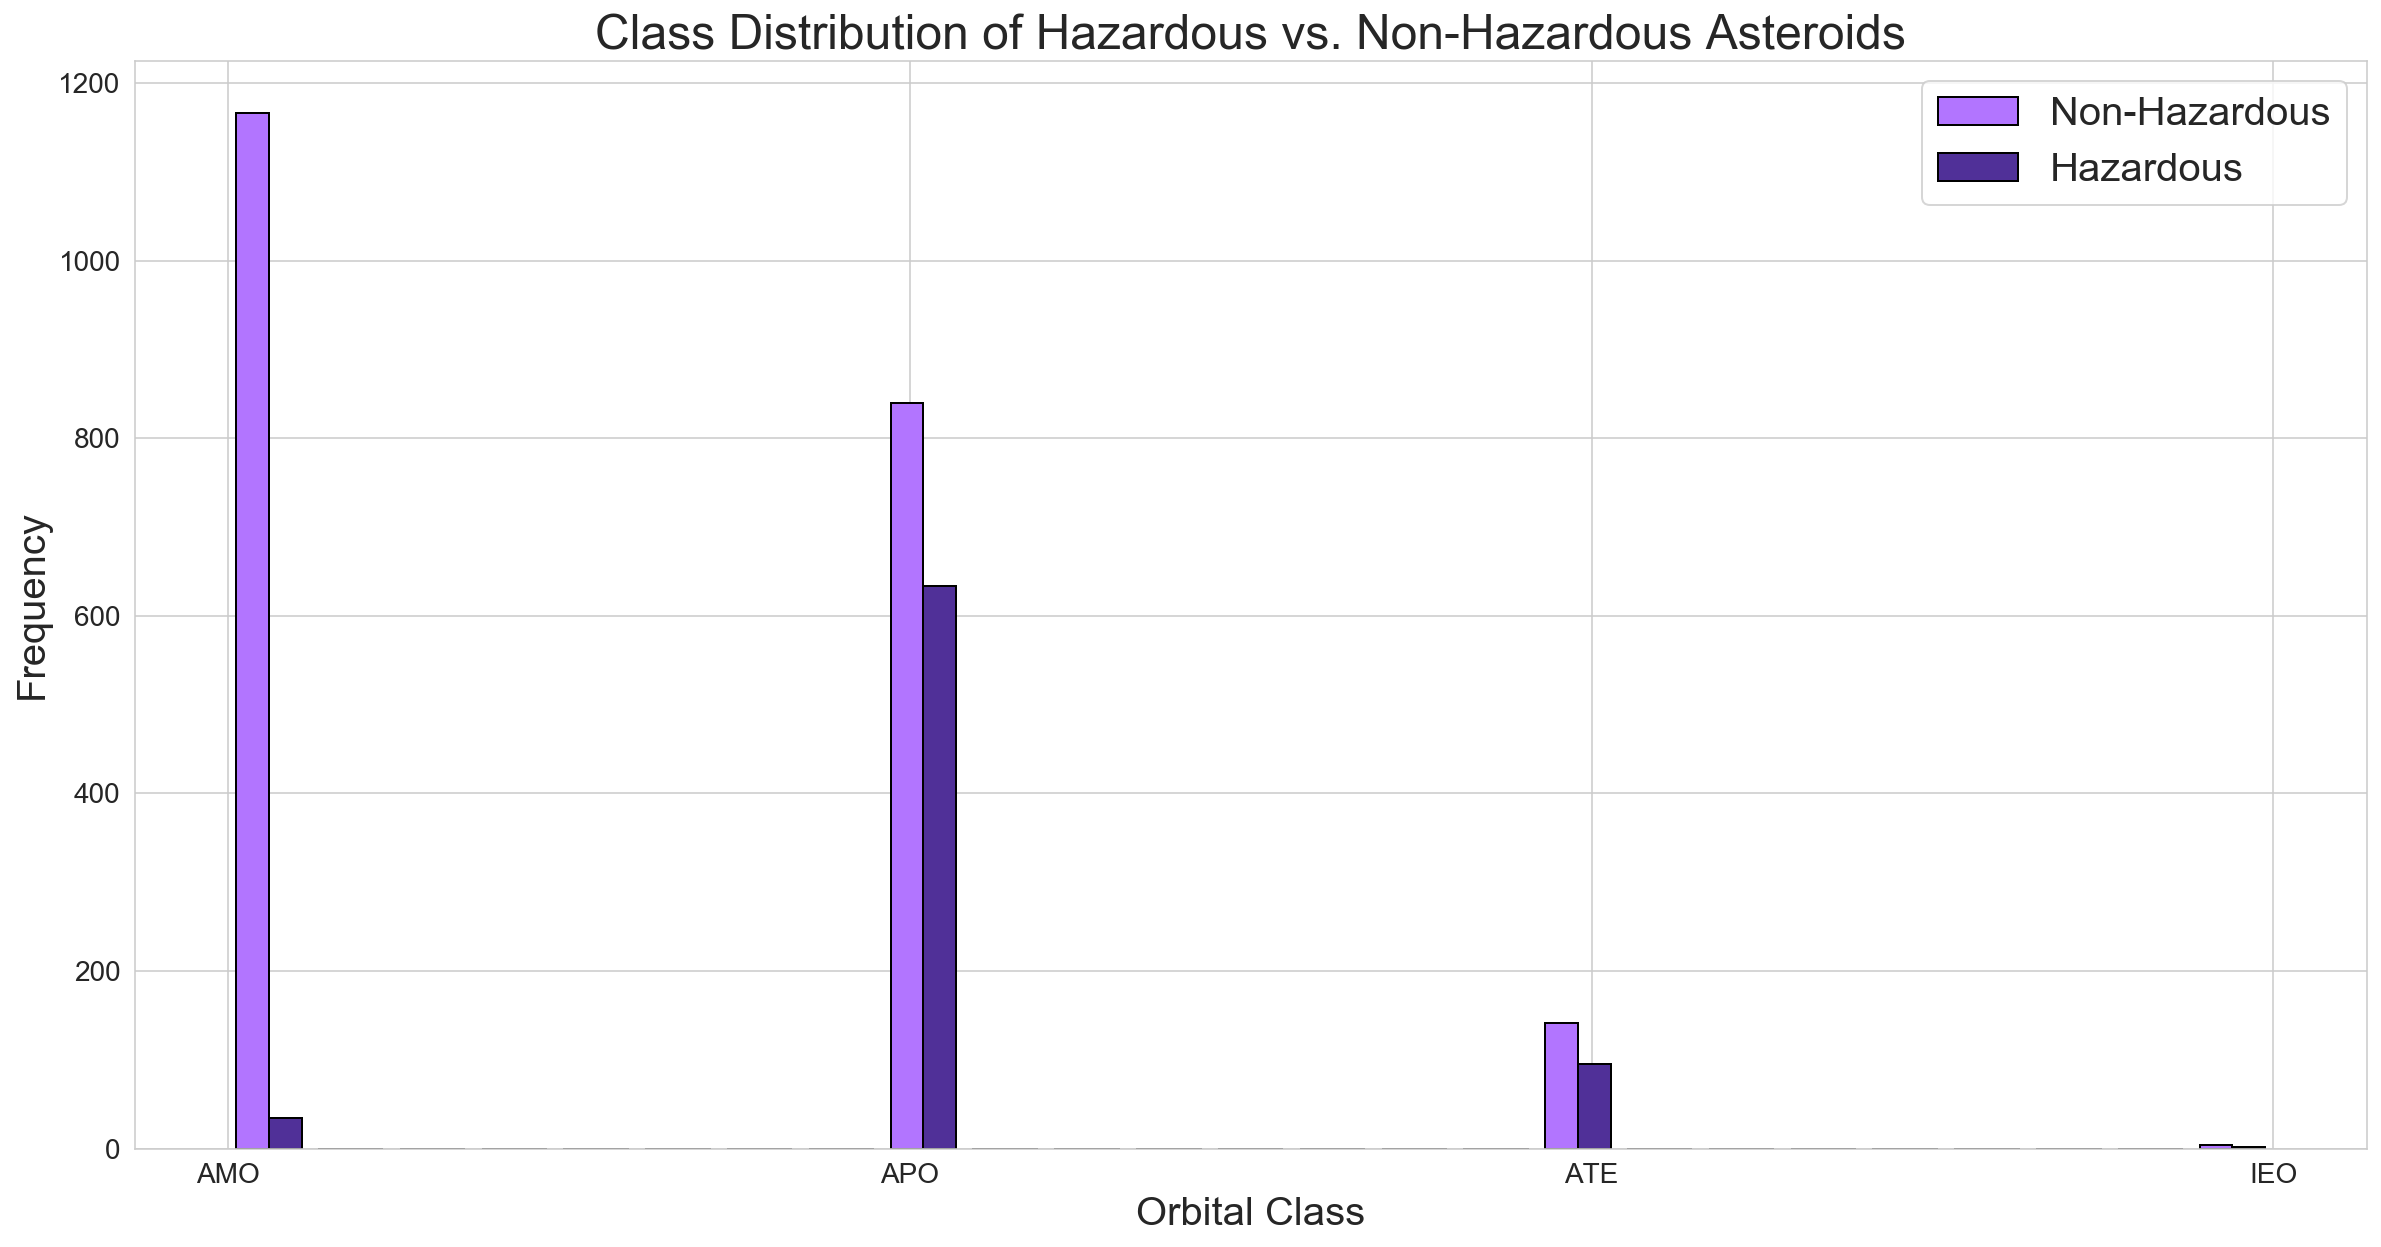

In [52]:
# Class Distribution of Hazardous vs. Non-Hazardous Asteroids
plt.figure(figsize=(20,10))
plt.hist([df[df['hazardous']==0]['class'], 
          df[df['hazardous']==1]['class']],
         bins=25, color=[c[0], c[3]], ec='k')

plt.title('Class Distribution of Hazardous vs. Non-Hazardous Asteroids', fontsize=24)
plt.xlabel('Orbital Class', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.legend(['Non-Hazardous', 'Hazardous'], fontsize=20)
plt.savefig('../images/PHA_asteroid_class_.png');

In [53]:
# Group orbital classes by the number of hazardous/non-hazardous asteroids in each
df.groupby('class')['hazardous'].value_counts()

class  hazardous
AMO    0            1166
       1              35
APO    0             840
       1             633
ATE    0             142
       1              95
IEO    0               4
       1               2
Name: hazardous, dtype: int64

In [54]:
# Baseline
df['hazardous'].value_counts(normalize=True)*100

0    73.774426
1    26.225574
Name: hazardous, dtype: float64

Create dummies for classes.

In [55]:
# get dummies for each asteroid class
# AMO was dropped
df = pd.get_dummies(df, columns=['class'], drop_first=True)

df.head(1)

neo  hazardous   epoch_cal  eccentricity_(e)  semi_major_axis_(a)  \
0    1          0  20200531.0          0.222951             1.458046   

   perihelion_dist_(q)  inclination_(i)  perihelion_arg_(w)  \
0             1.132973        10.830543          178.882294   

   abs_magnitude_(H)  mean_anomaly  ...  mean_motion_(n)  \
0               10.4    271.071732  ...         0.559819   

   min_orbit_intersection_dist  t_jupiter  asc_node_long_(deg)  \
0                     0.148623      4.582           304.299327   

   orbital_per_(y)  first_obs   last_obs class_APO  class_ATE  class_IEO  
0         1.760617 1893-10-29 2019-02-13         0          0          0  

[1 rows x 21 columns]

### EDA

Compare the distribution of hazardous/non-hazardous asteroids with respect to asbolute magnitude.

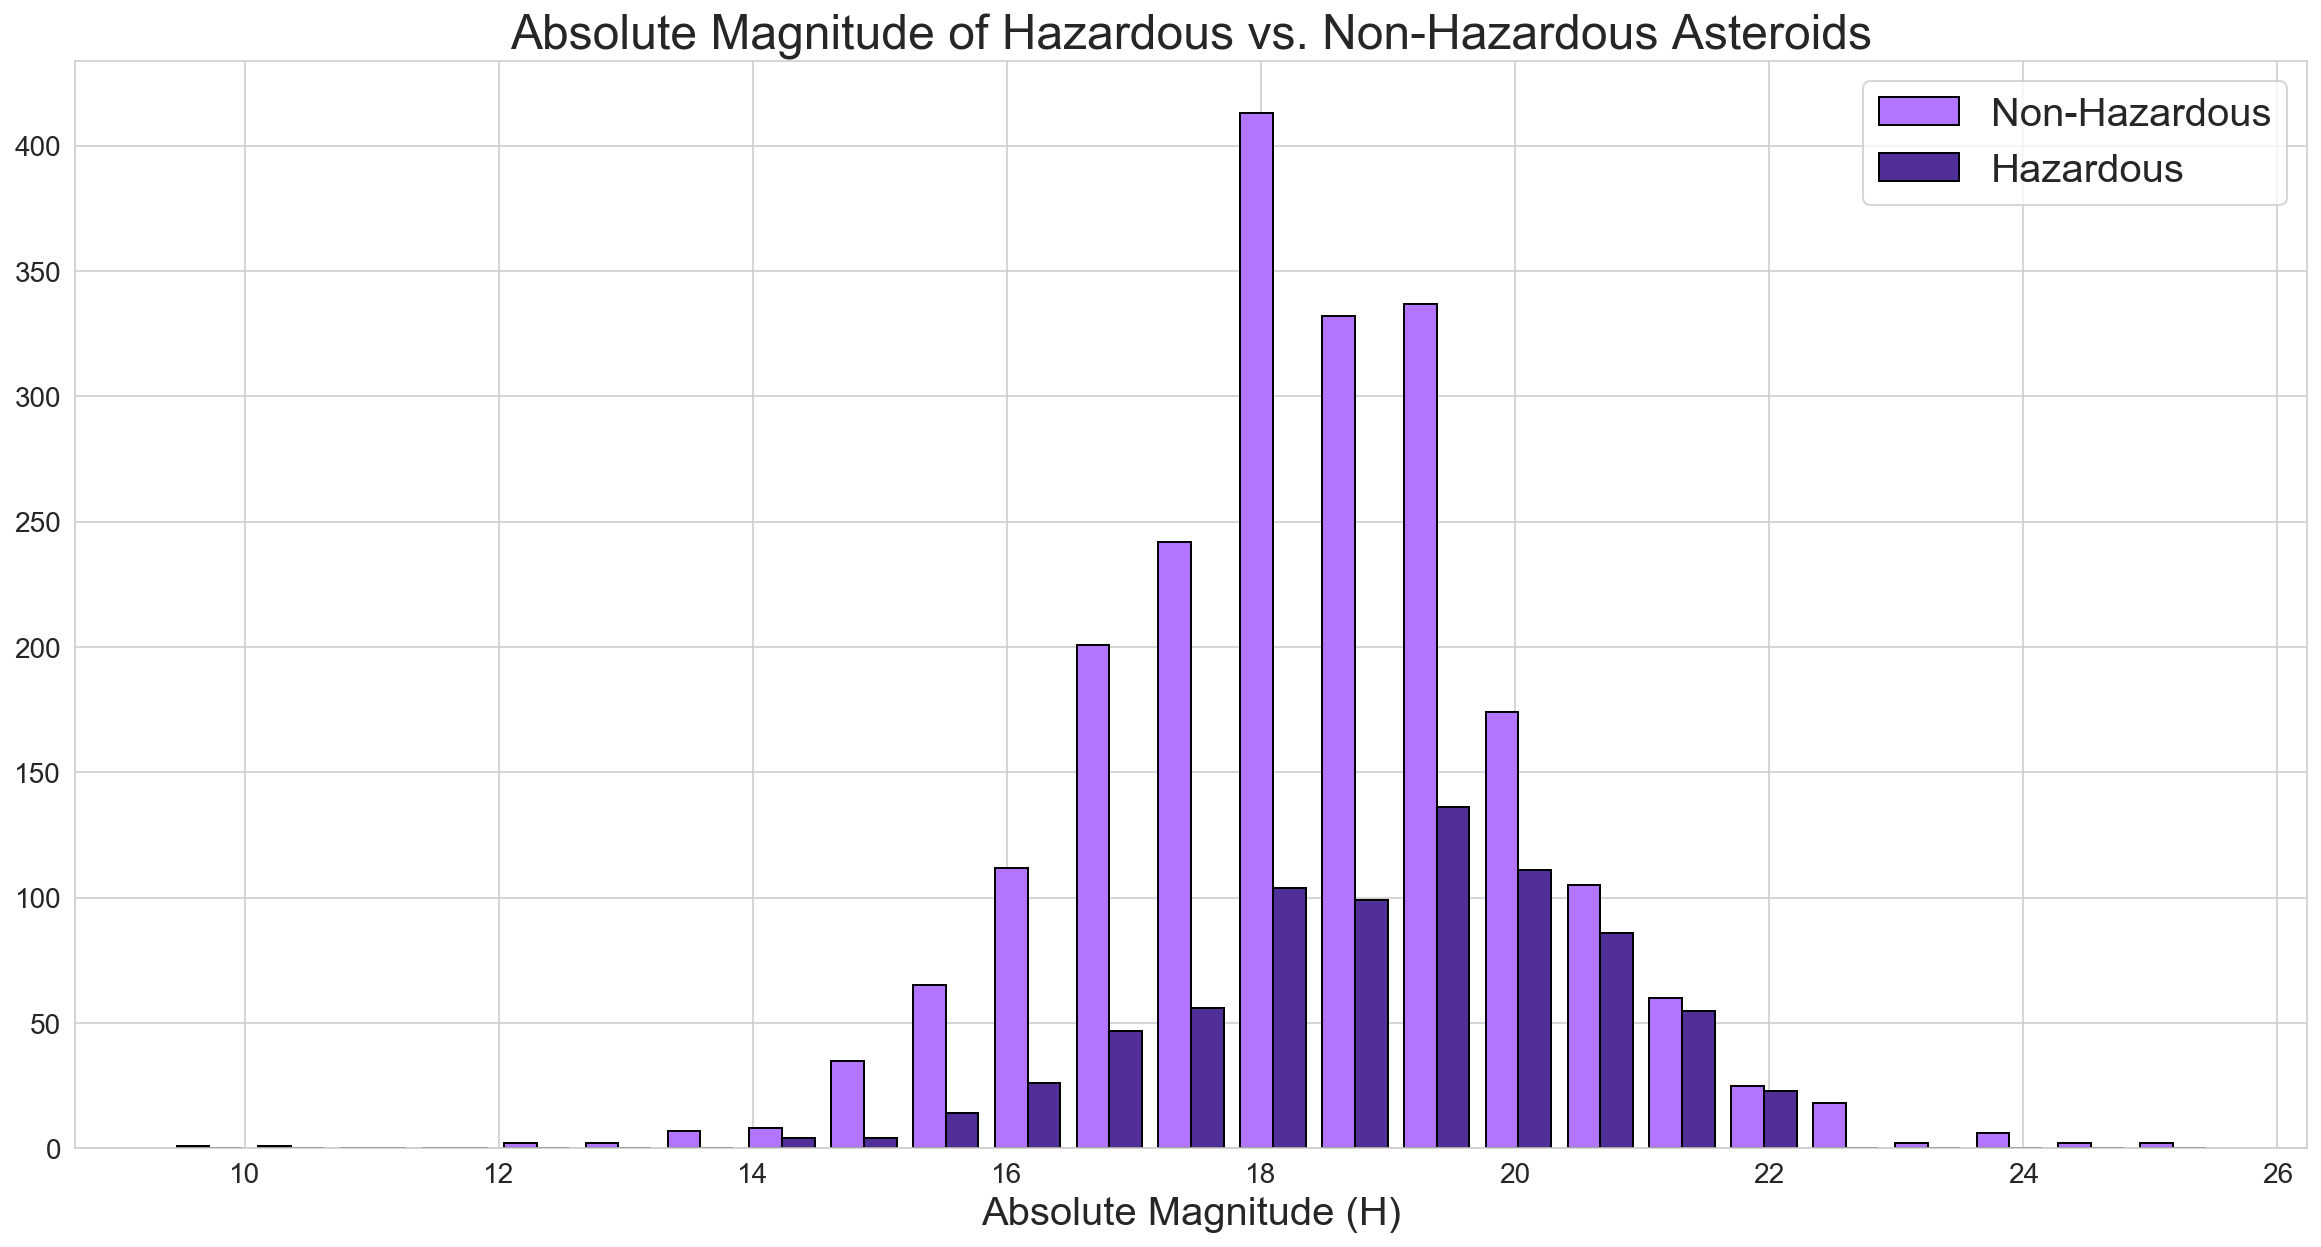

In [56]:
plt.figure(figsize=(20,10))
plt.hist([df[df['hazardous']==0]['abs_magnitude_(H)'], 
          df[df['hazardous']==1]['abs_magnitude_(H)']],
         bins=25, color=[c[0], c[3]], ec='k')

plt.title('Absolute Magnitude of Hazardous vs. Non-Hazardous Asteroids', fontsize=24)
plt.xlabel('Absolute Magnitude (H)', fontsize=20)
plt.legend(['Non-Hazardous', 'Hazardous'], fontsize=20)
# plt.savefig('../images/abs_mag.png');

Create function that takes in: a data framee, list of columns, list of titles, and list of x labels and outputs: a histogram of the corresponding list of columns.

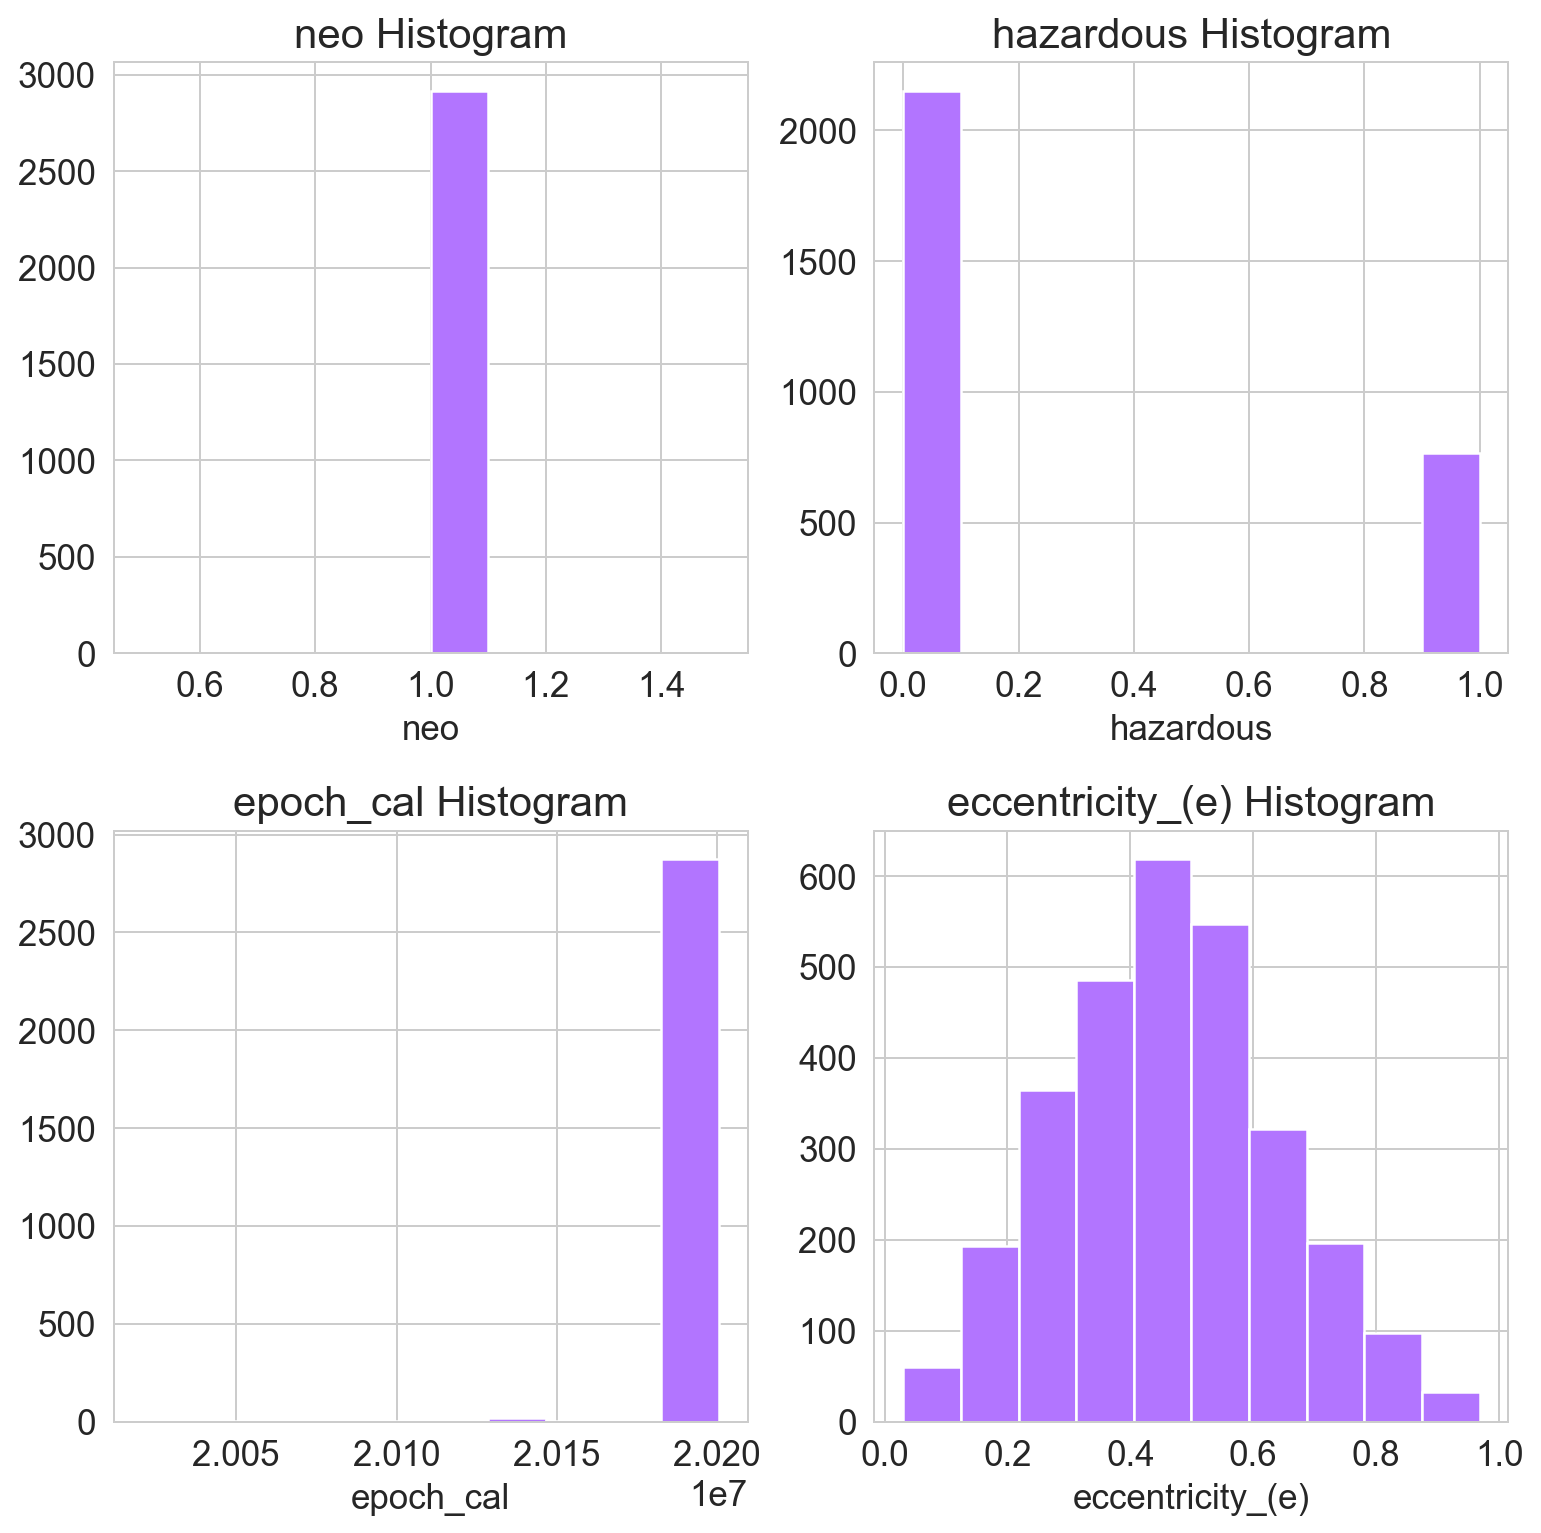

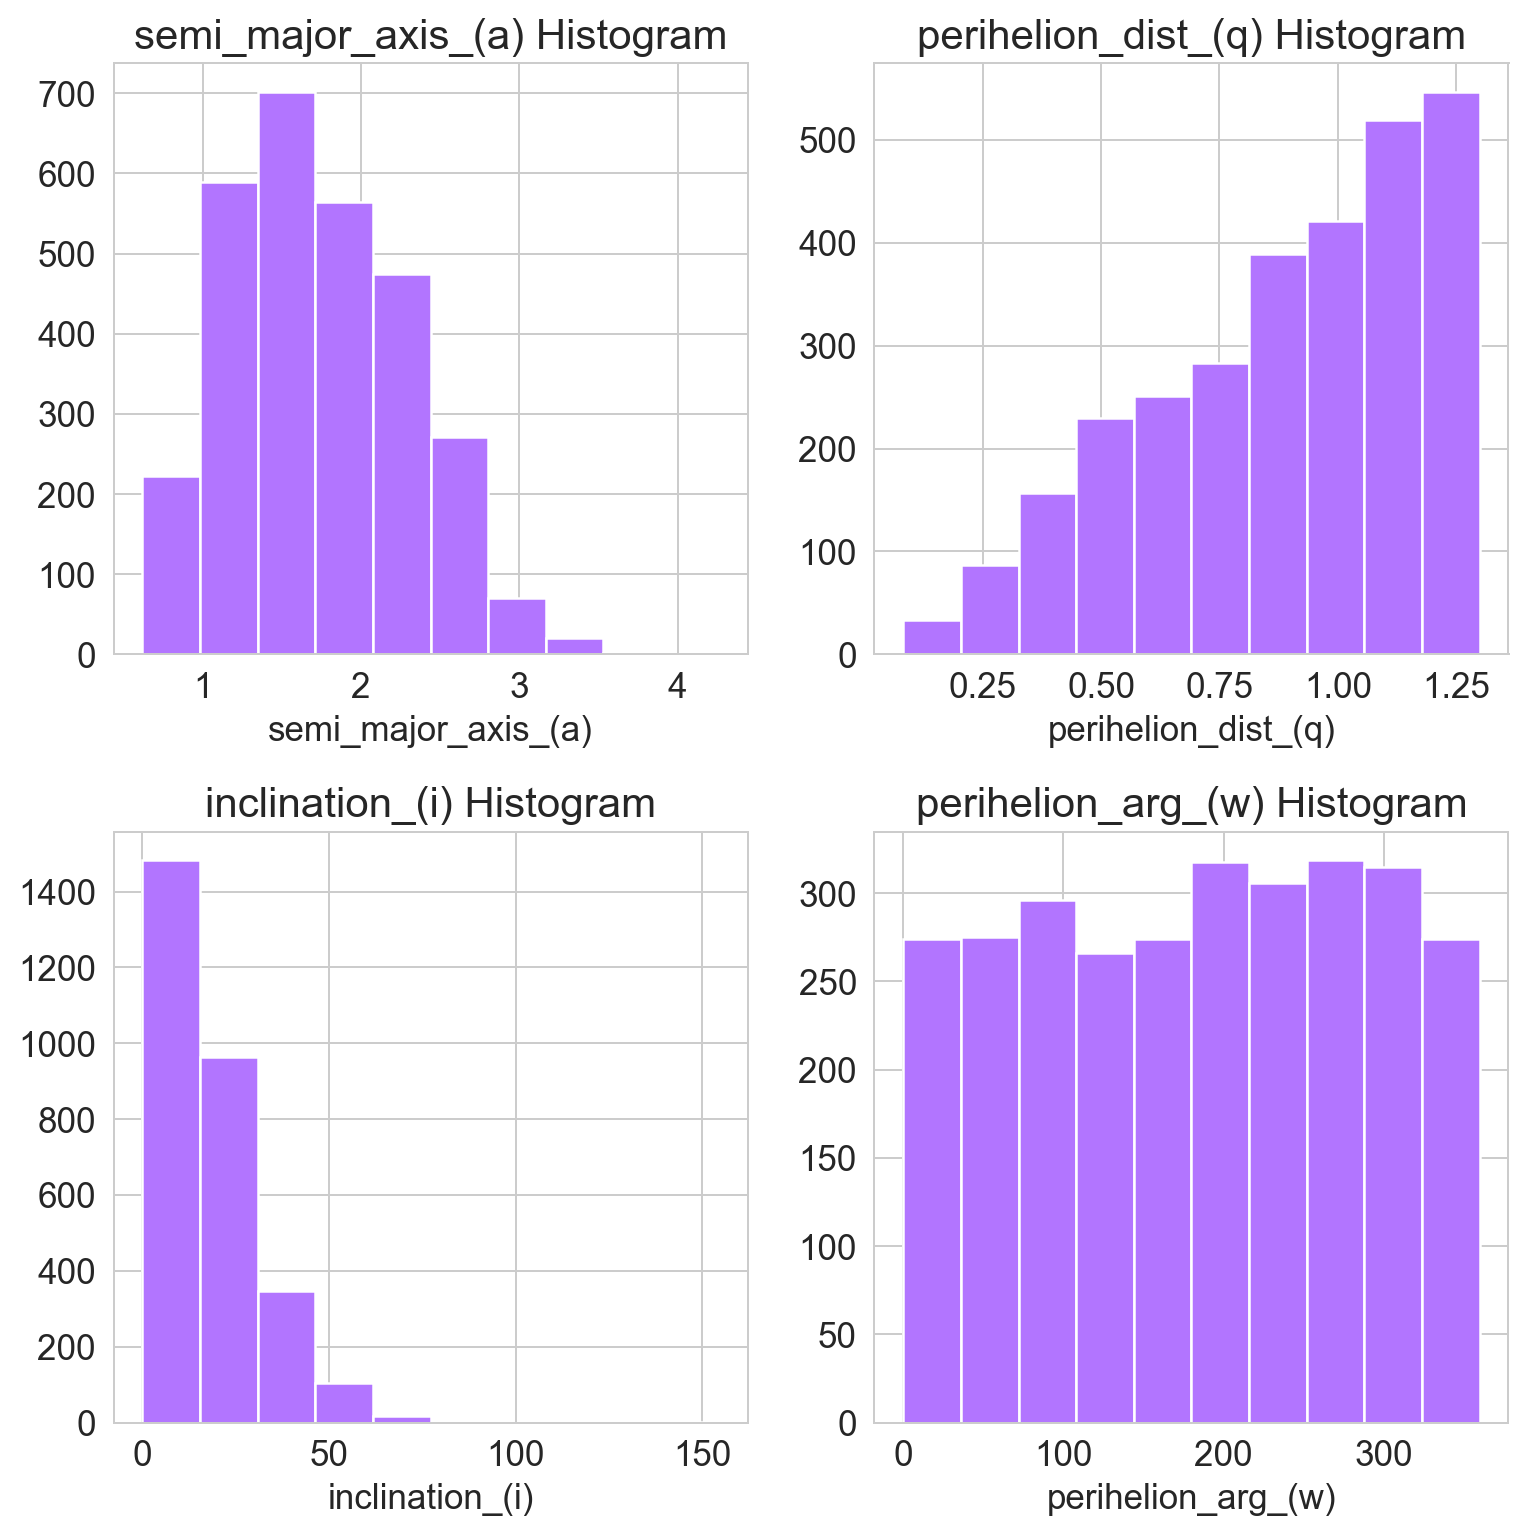

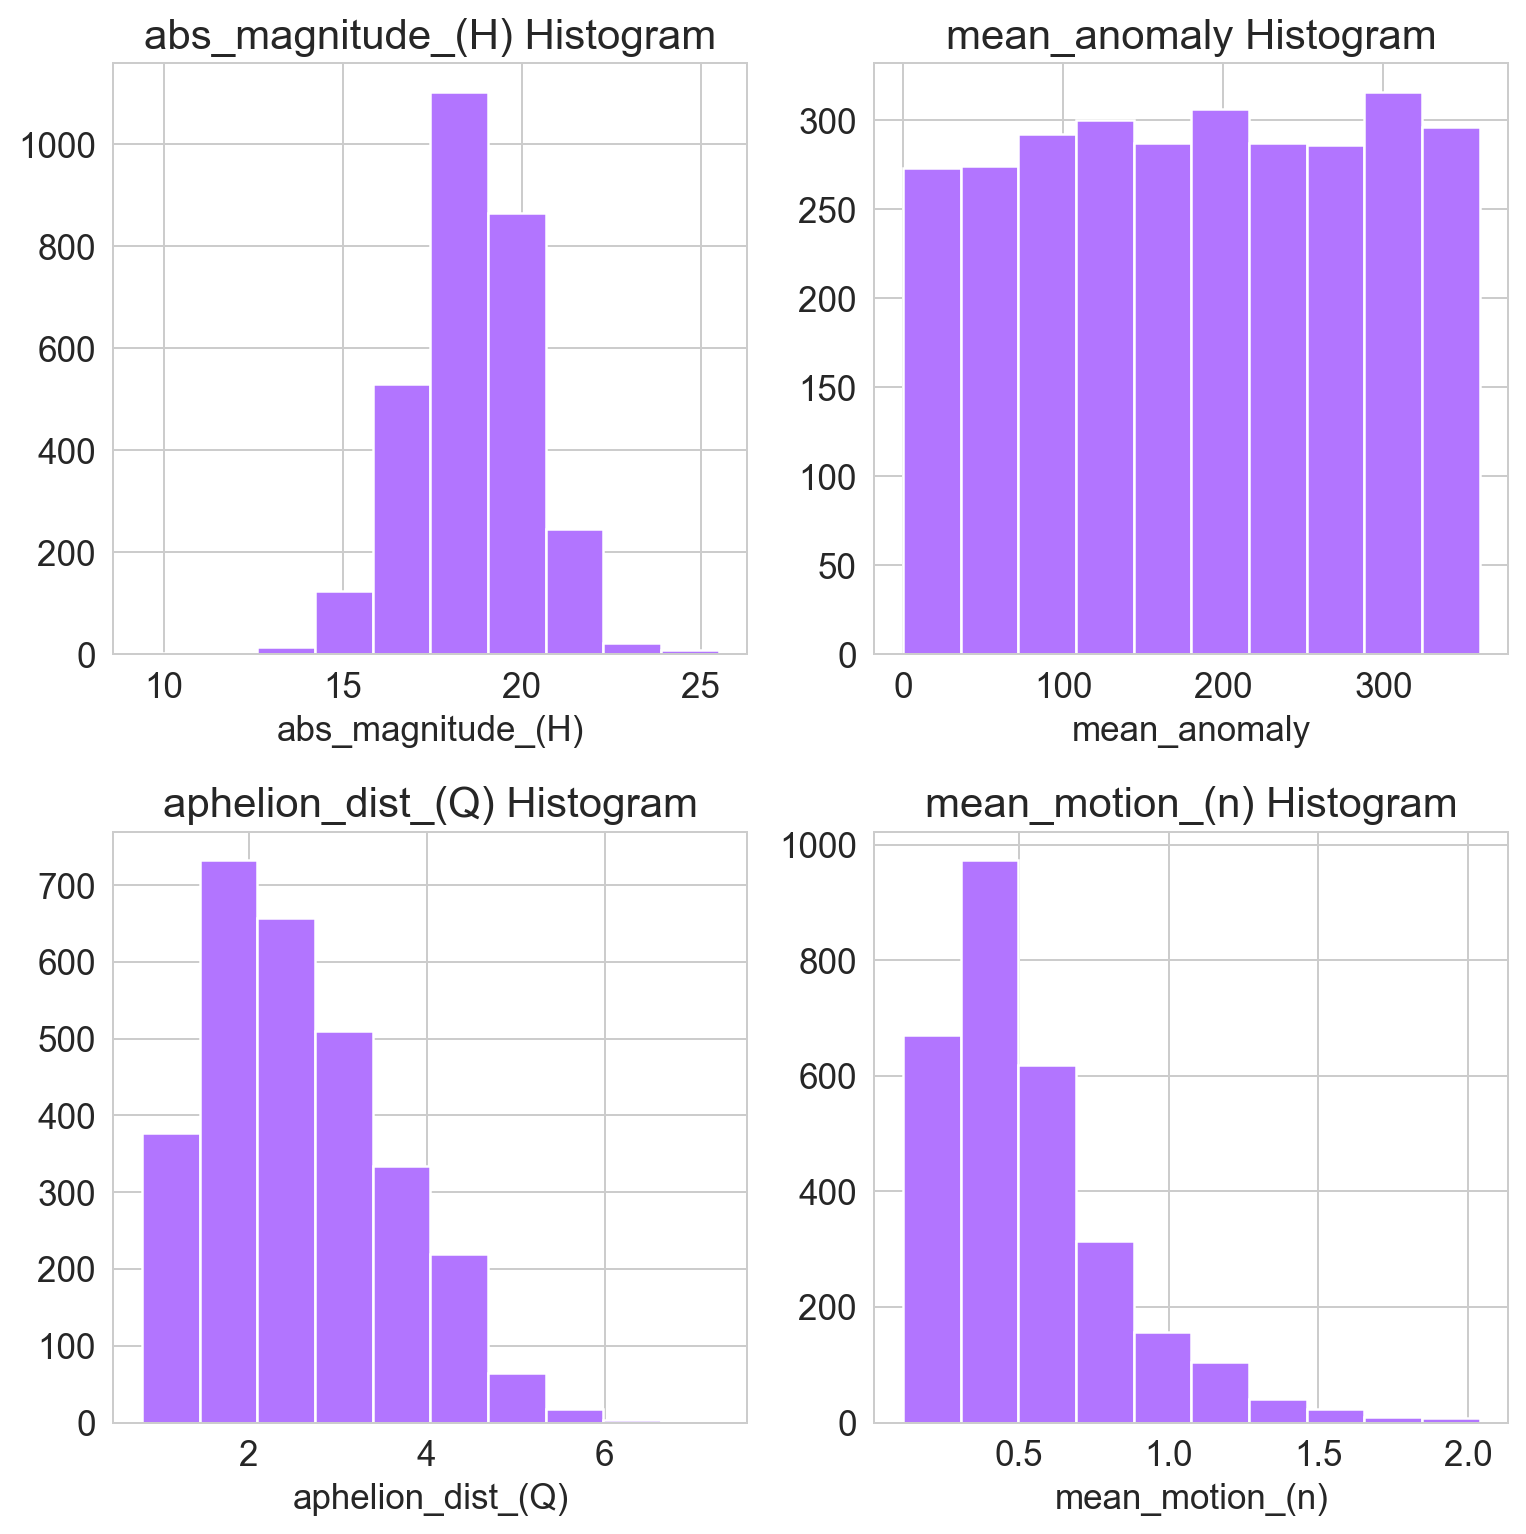

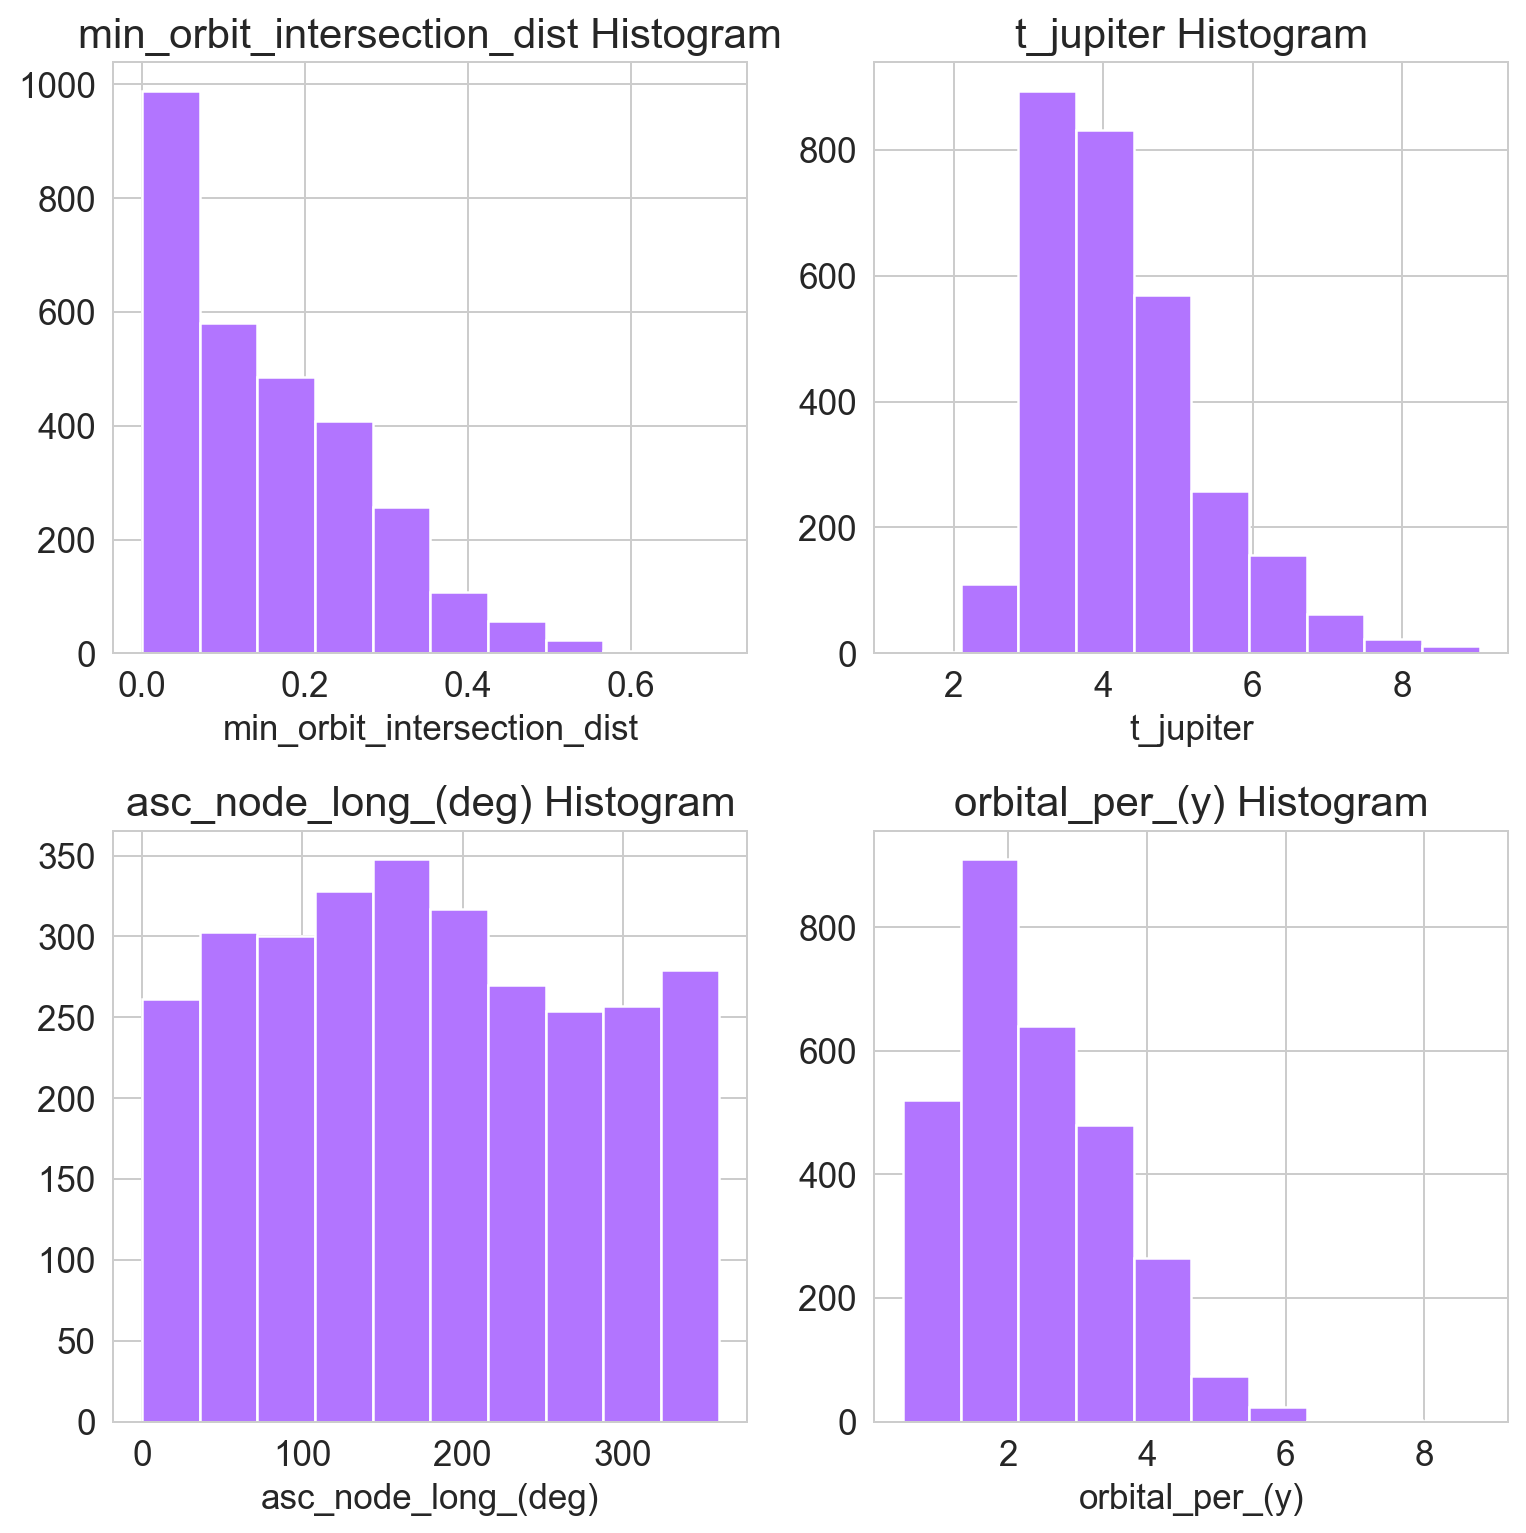

In [57]:
# Create Function that plots histograms of four columns at a time
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (10,10), dpi = 90) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    colors = [c[0], c[0], c[0], c[0]]
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], color = colors[i]) # feel free to add more settings
        # Set titles, labels, etc for each subplot
    for i, title in enumerate(list_of_titles):
        ax[i].set(title=f'{title} Histogram')
    for i, xlabel in enumerate(list_of_xlabels):
        ax[i].set(xlabel=xlabel)
    plt.subplots_adjust(hspace=0.3)

# Histogram Graphs
subplot_histograms(df,
                   ['neo', 'hazardous', 'epoch_cal', 'eccentricity_(e)'],
                   ['neo', 'hazardous', 'epoch_cal', 'eccentricity_(e)'],
                   ['neo', 'hazardous', 'epoch_cal', 'eccentricity_(e)']
                  )


subplot_histograms(df,
                   ['semi_major_axis_(a)', 'perihelion_dist_(q)', 'inclination_(i)', 'perihelion_arg_(w)'],
                   ['semi_major_axis_(a)', 'perihelion_dist_(q)', 'inclination_(i)', 'perihelion_arg_(w)'],
                   ['semi_major_axis_(a)', 'perihelion_dist_(q)', 'inclination_(i)', 'perihelion_arg_(w)']
                  )


subplot_histograms(df,
                  ['abs_magnitude_(H)', 'mean_anomaly', 'aphelion_dist_(Q)', 'mean_motion_(n)'],
                  ['abs_magnitude_(H)', 'mean_anomaly', 'aphelion_dist_(Q)', 'mean_motion_(n)'],
                  ['abs_magnitude_(H)', 'mean_anomaly', 'aphelion_dist_(Q)', 'mean_motion_(n)']
                  )


subplot_histograms(df,
                  ['min_orbit_intersection_dist', 't_jupiter', 'asc_node_long_(deg)', 'orbital_per_(y)'],
                  ['min_orbit_intersection_dist', 't_jupiter', 'asc_node_long_(deg)', 'orbital_per_(y)'],
                  ['min_orbit_intersection_dist', 't_jupiter', 'asc_node_long_(deg)', 'orbital_per_(y)'])

**Histograms Interpretation**
>Based on the histograms, most of the features are not normally distributed, which not surprising coming from asteroids. The `hazardous` target is highly unbalanced where there are many more observations for non-hazardous asteroids. The `neo` categories are also slightly unbalanced where there are more observations for non-neo's. When it comes to eccentricity, the majority of observations have a lower eccentricity value from 0 to 0.1 and the rest are more normally distributed from 0.2 - 1.0. Eccentricity corresponding to an elliptical orbit ranges from 0 to 1, which is estimated for asteroid observations.

#### Box Plot Graphs

Check distribution of features with quick box plot graphs.

<Figure size 1080x648 with 0 Axes>

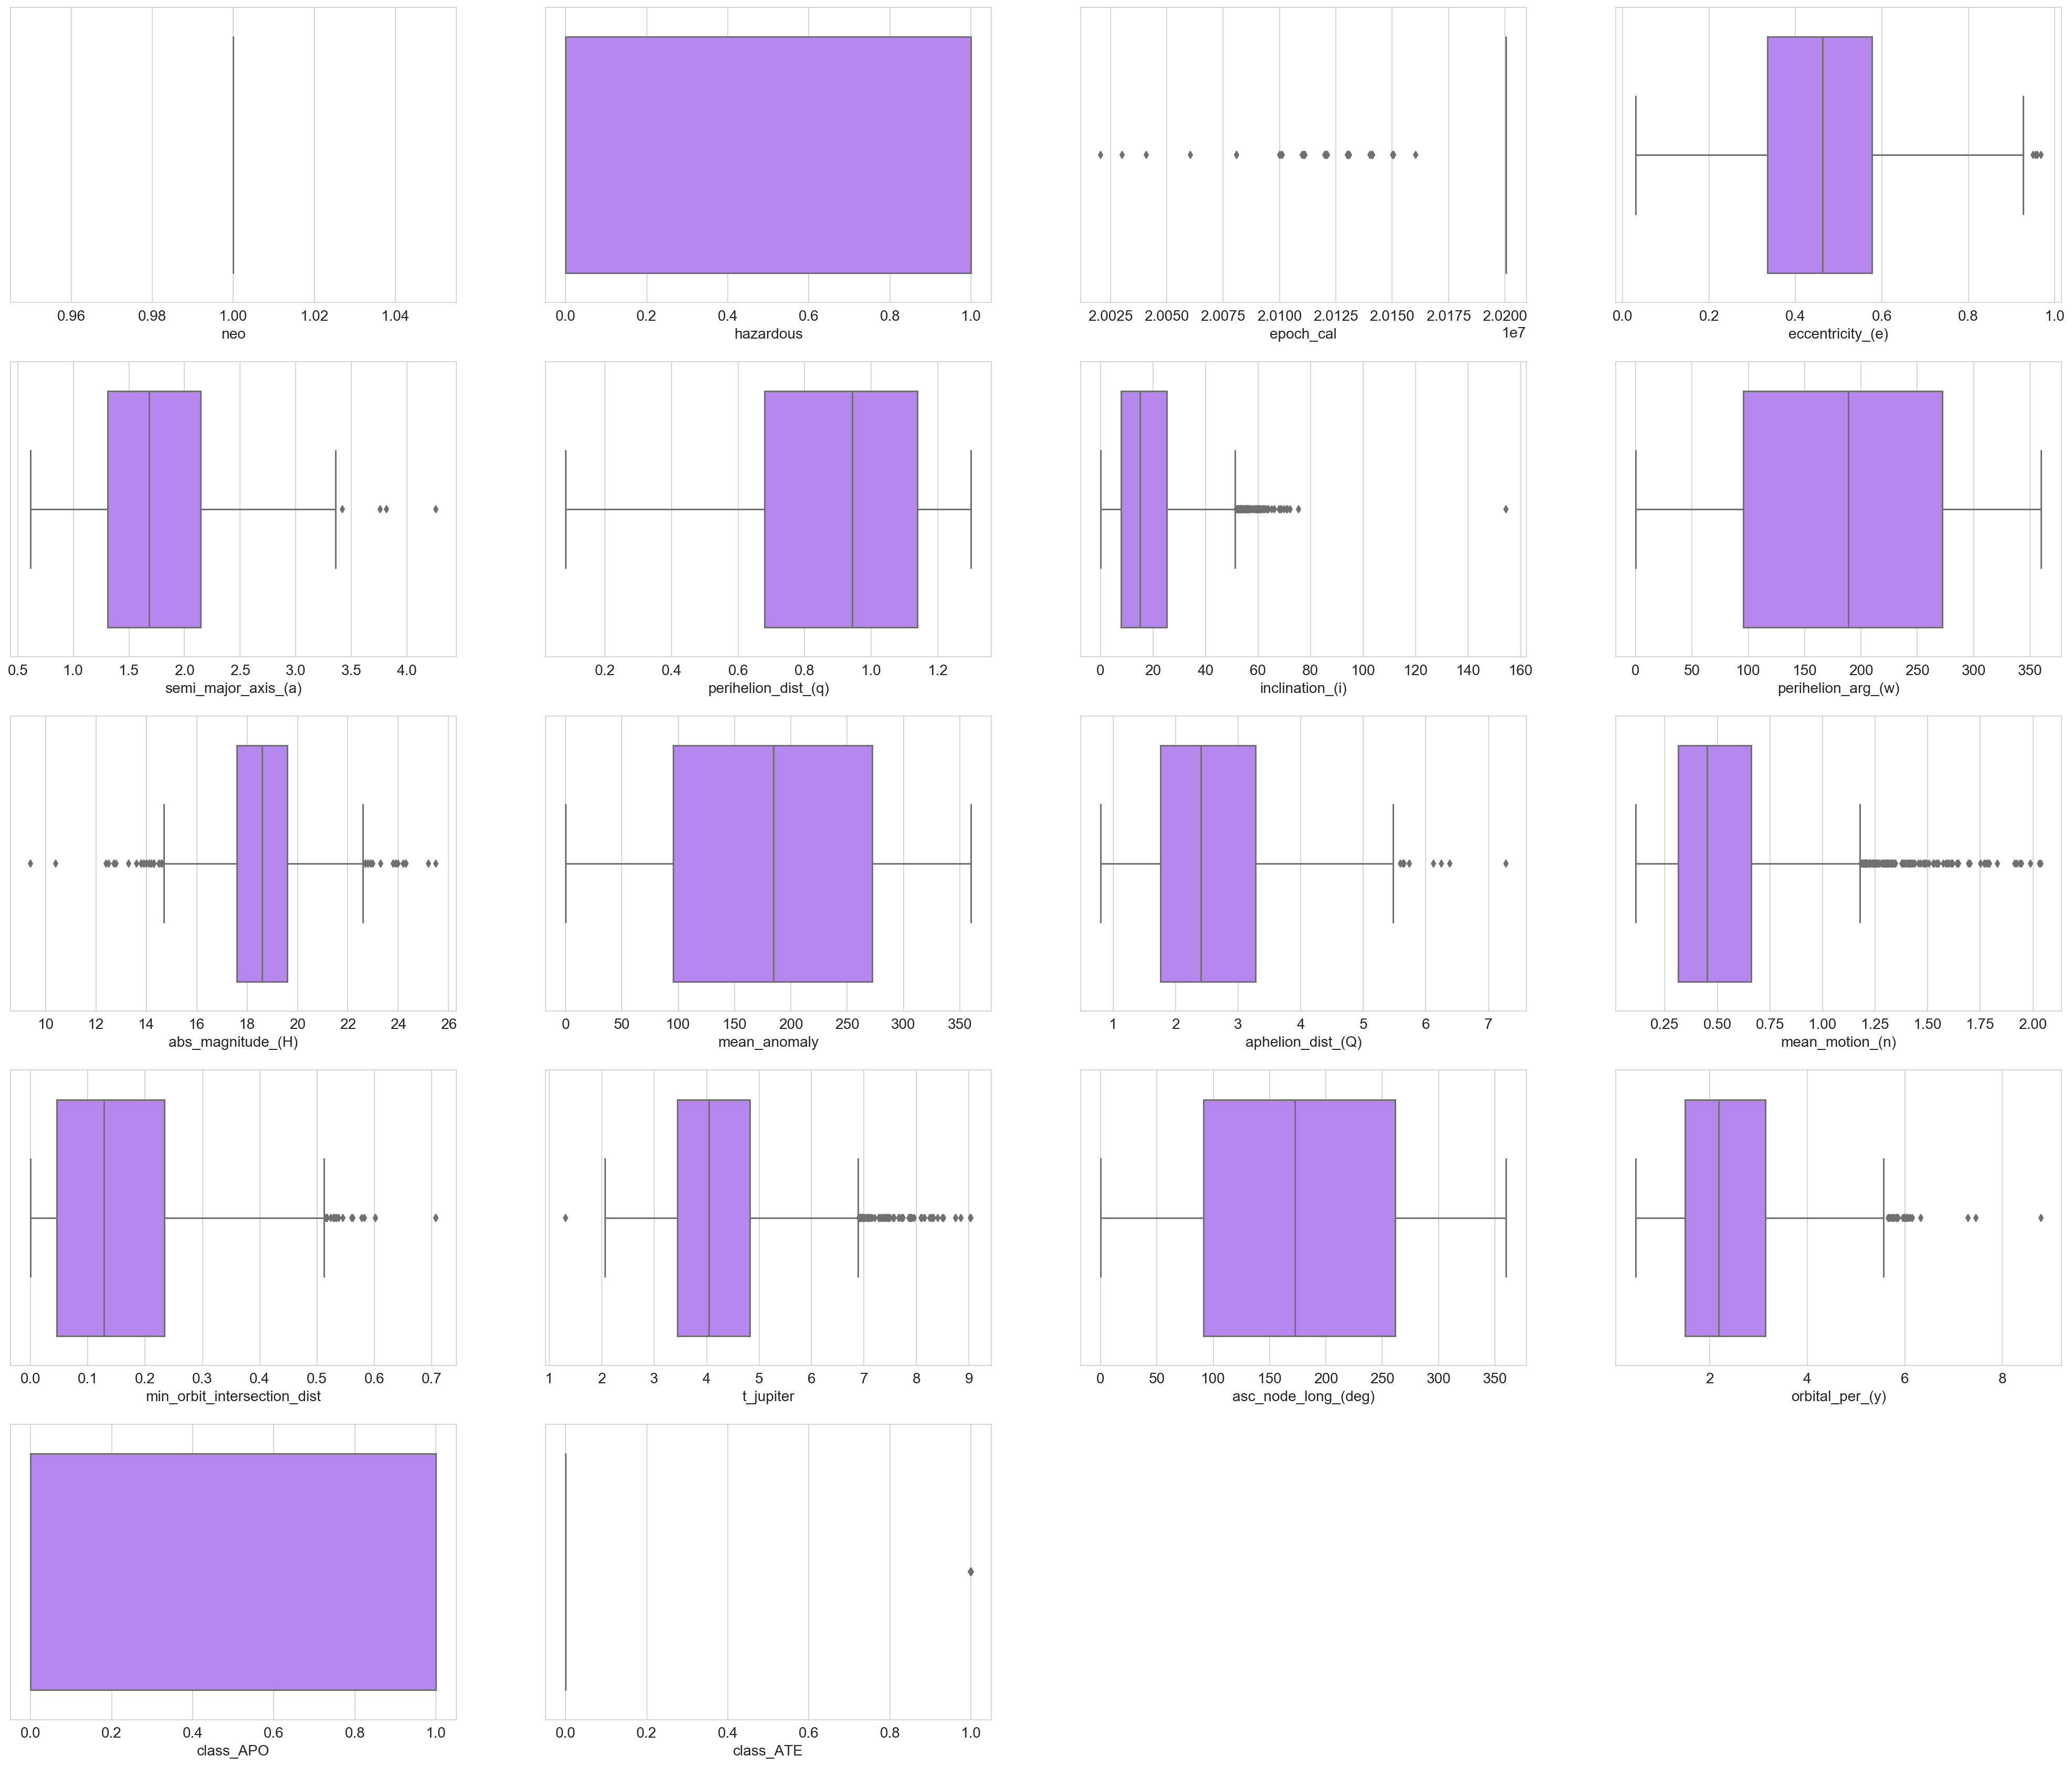

In [58]:
# Make a data frame with only numberic columns
df_numeric = df.describe().columns

plt.tight_layout(pad=0.9)
plt.figure(figsize=(35,30)); 
plt.subplots_adjust(wspace = 0.2)
number_columns = 4 
number_graphs = len(df_numeric) 
number_rows = int(np.ceil(number_graphs/number_columns)) 
columns = list(df[df_numeric].columns.values); 

for i in range(0, len(columns)-1): 
    plt.subplot(number_rows, number_columns, i+1) 
    ax1=sns.boxplot(x= columns[i], data= df[df_numeric], orient="h", color=c[0]);

**Box Plots Interpretation**
>The features with the most outliers are the jupiter tisserand parameter, mean motion, epoch, inclination, and the orbital classes. Eventhough it is clear there are many outliers in a vast number of features, I am deciding to keep them because I don't expect all the data to be normally distributed and am also considering the fact that many of these recordings are estimations or derived from non-direct measurements. In addition, I need all the observations I have since the dataset is small and the classes are unbalanced.

In [59]:
# sns.pairplot(df)

#### Correlation Heatmaps

Create heatmaps to visualize the correlation of all features against all features and target label with all fearues.

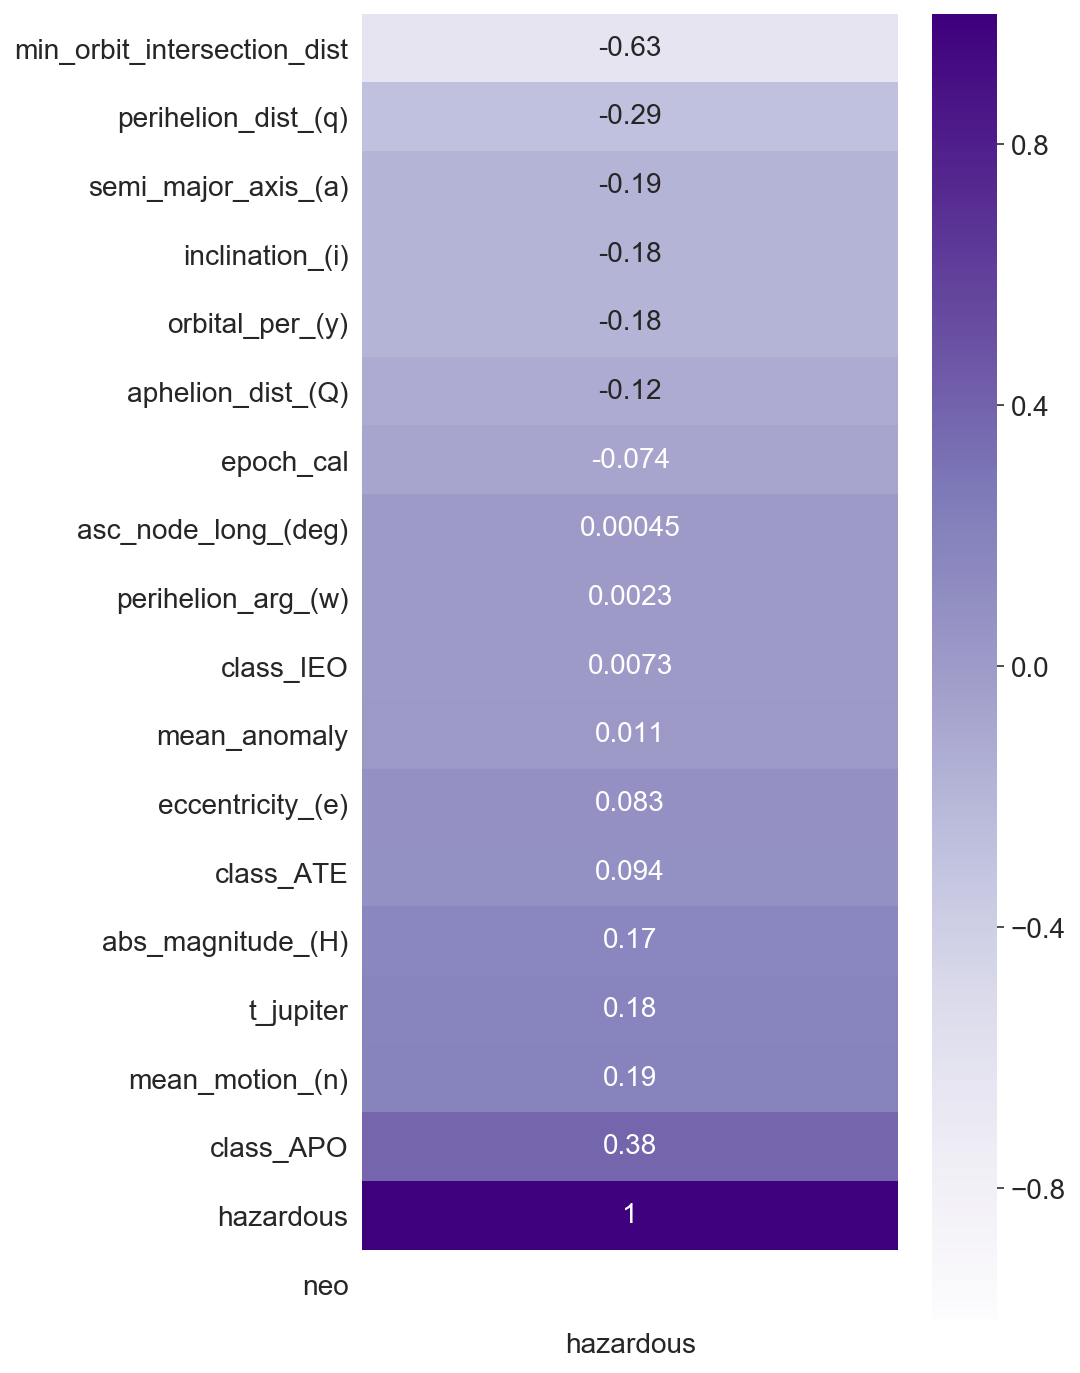

In [60]:
corr = df.corr()[['hazardous']].sort_values('hazardous')

plt.figure(figsize = (6,12));
sns.heatmap(corr,
           vmin=-1,
           vmax=1,
           cmap='Purples',
           annot=True)

# https://github.com/mwaskom/seaborn/issues/1773
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show();
# plt.savefig('../images/hazardous_feature_corr.png');

From the distributions and heatmap above, it seems NEO has is consistent throughout the dataset, that is, all these observations are NEOs, therefore I am going to drop it.

In [61]:
# plt.scatter(df['neo'], df['hazardous'])
df.drop(columns='neo', inplace=True)

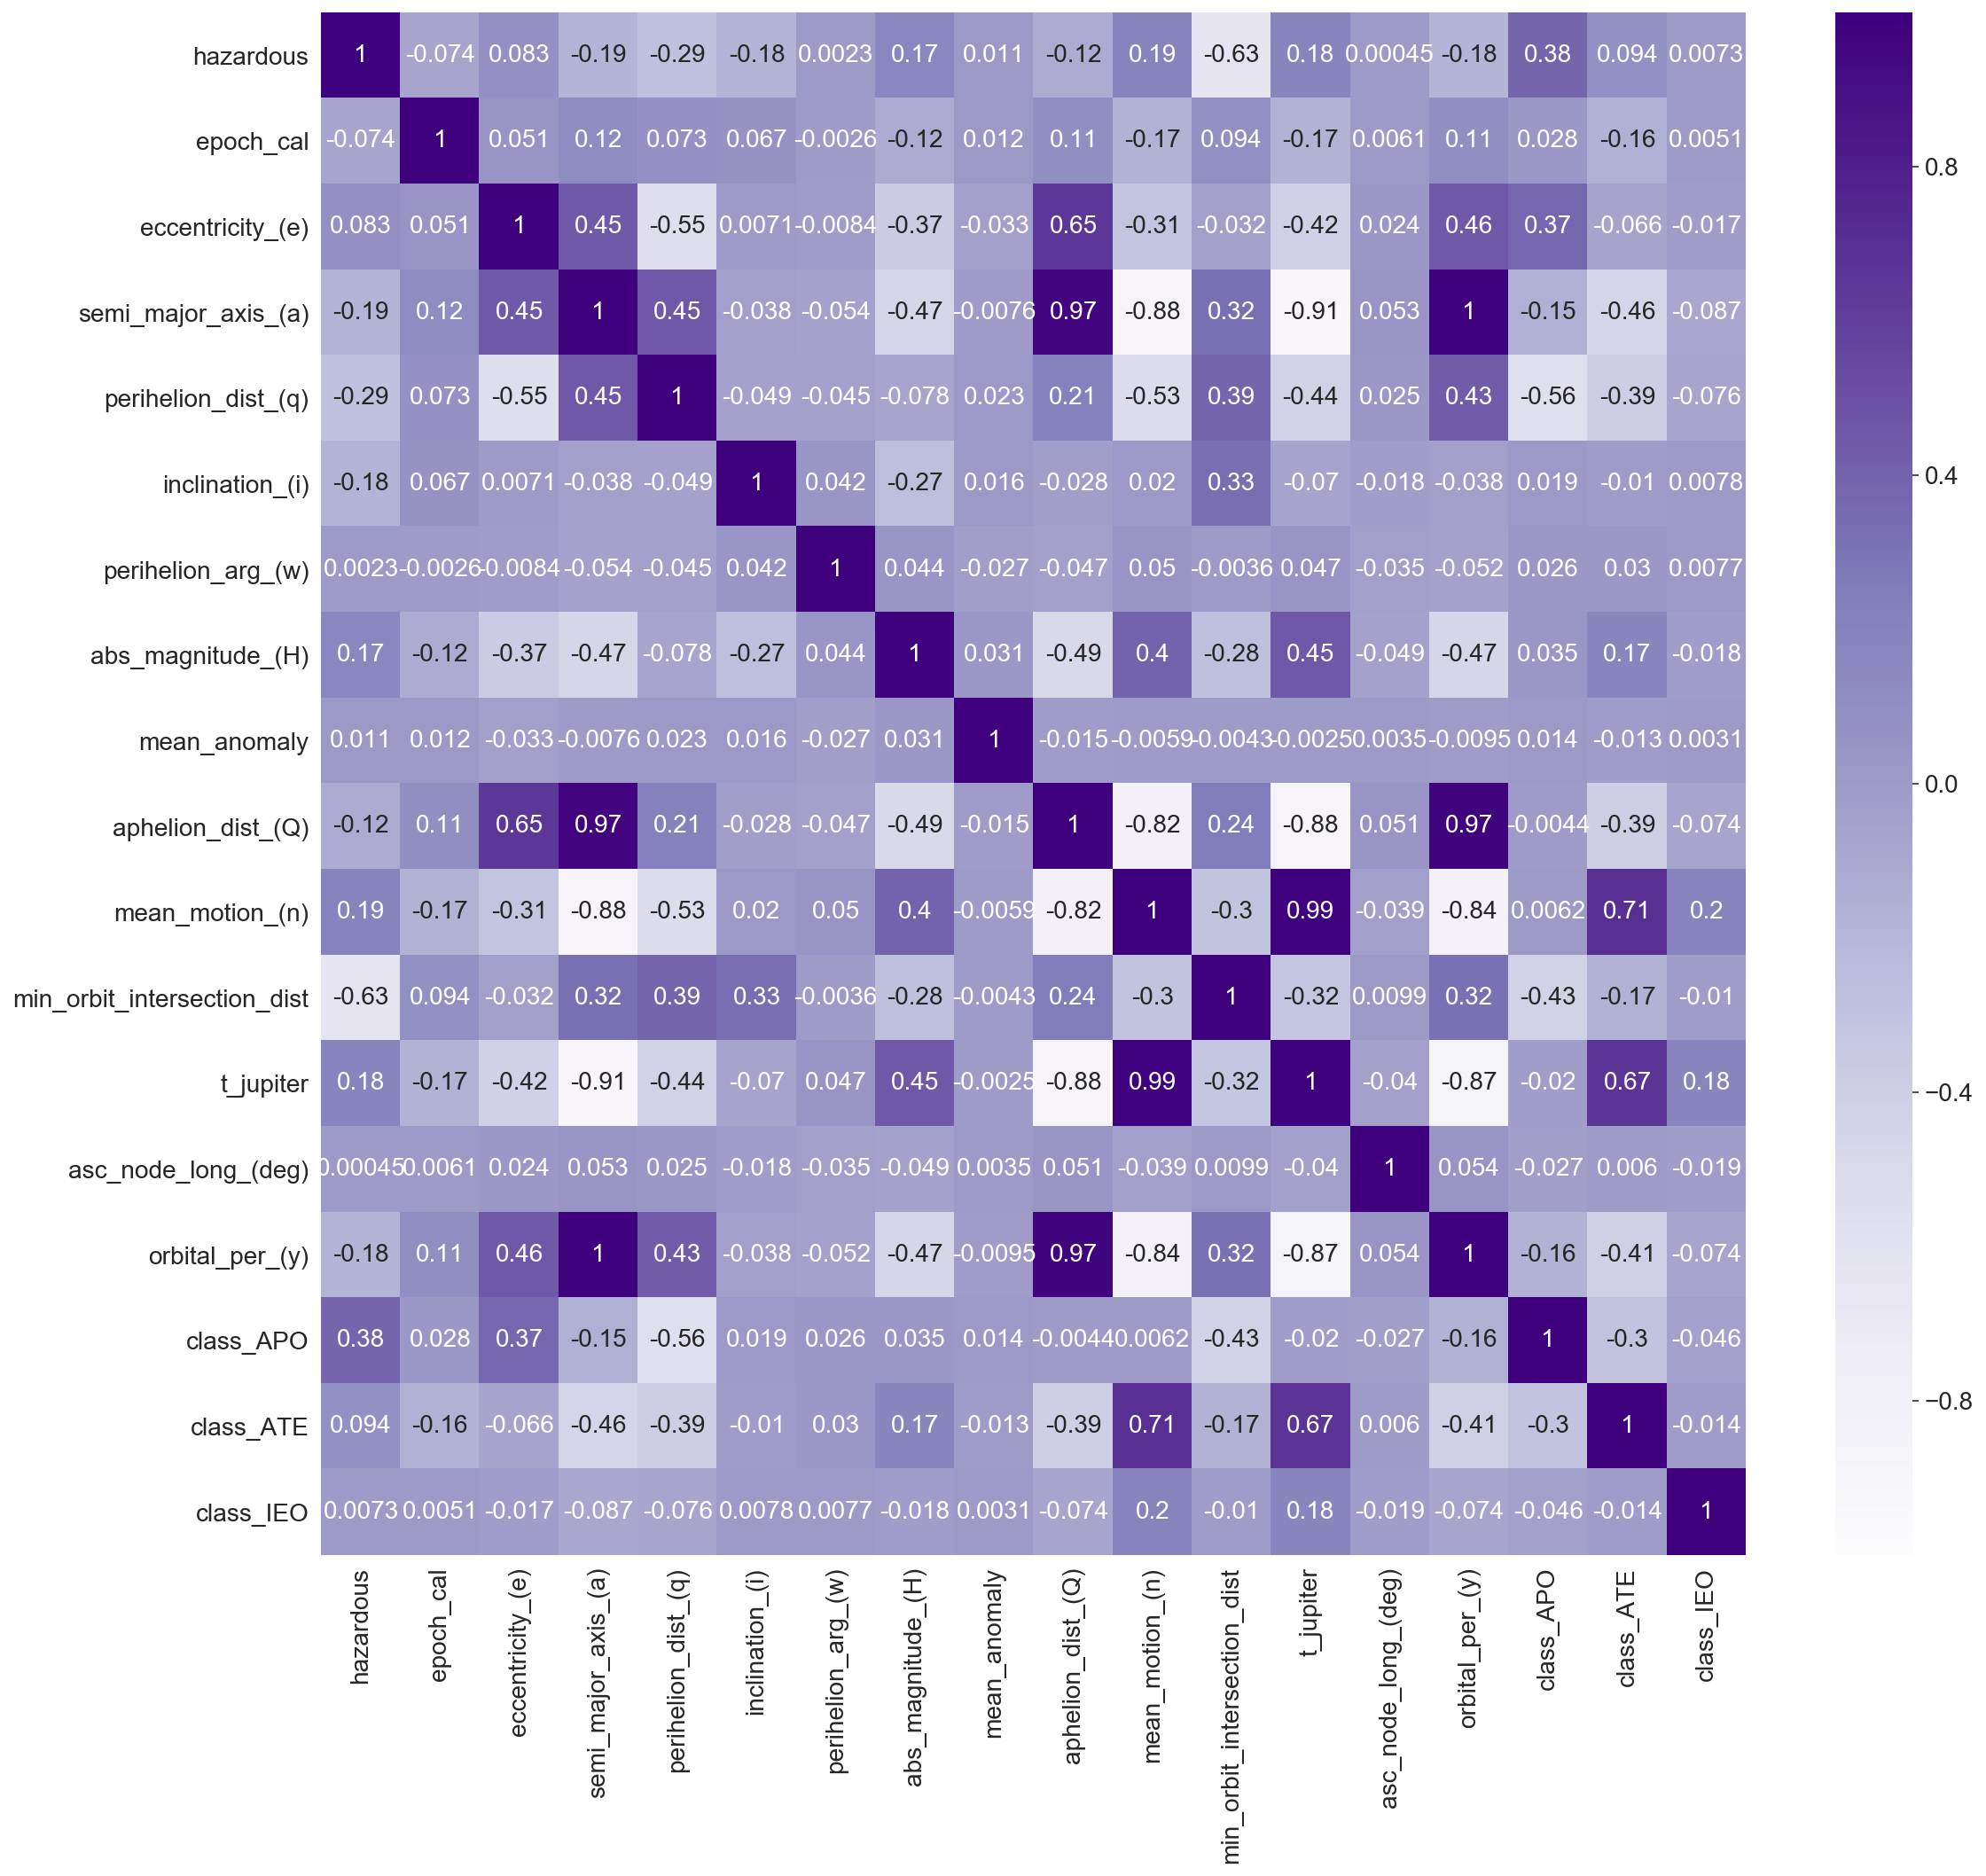

In [62]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='Purples' );


b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show();

#### Scatter Plots

Based on the correlations from above, I looked more closely at specific relationships using scatter plots.  

Create a function that inputs: a data frame, list of columns (the two I am comparing), title, x label, and y label and outputs: a scatter plot graph.

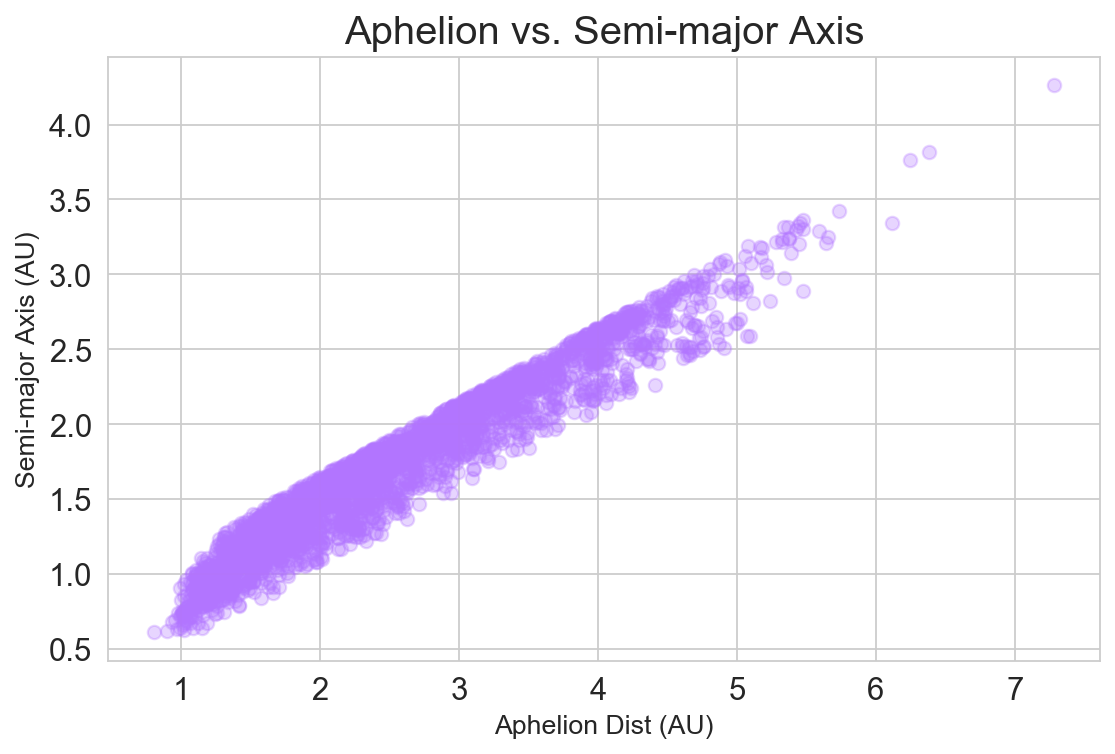

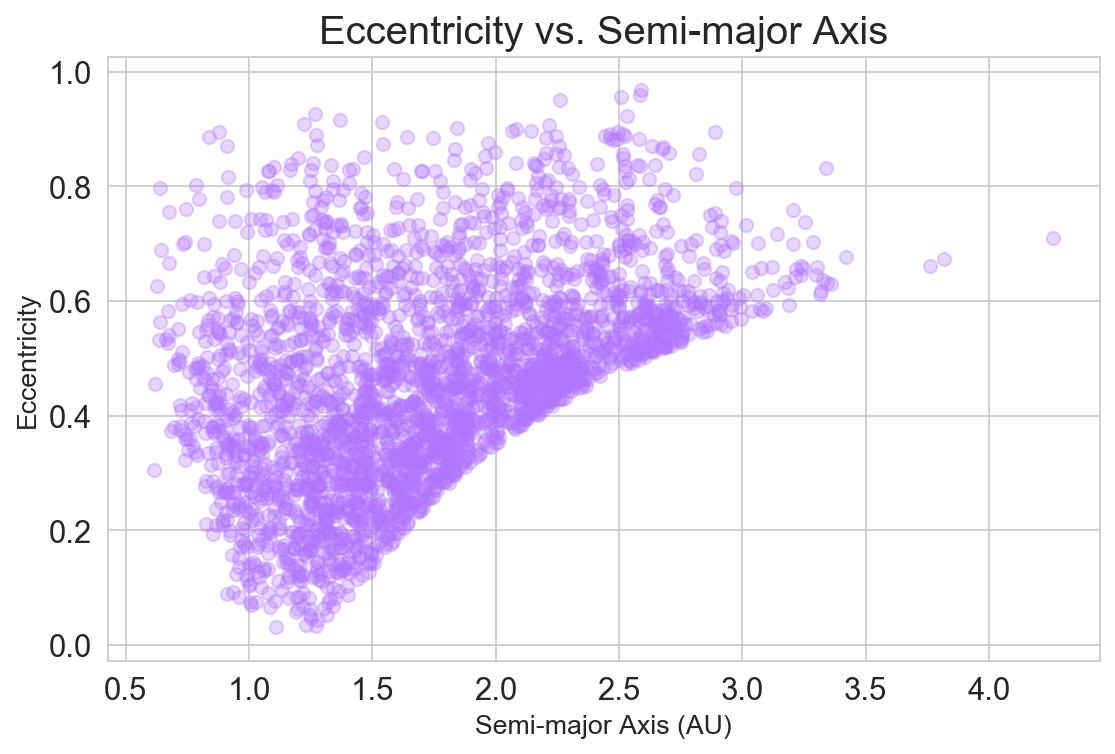

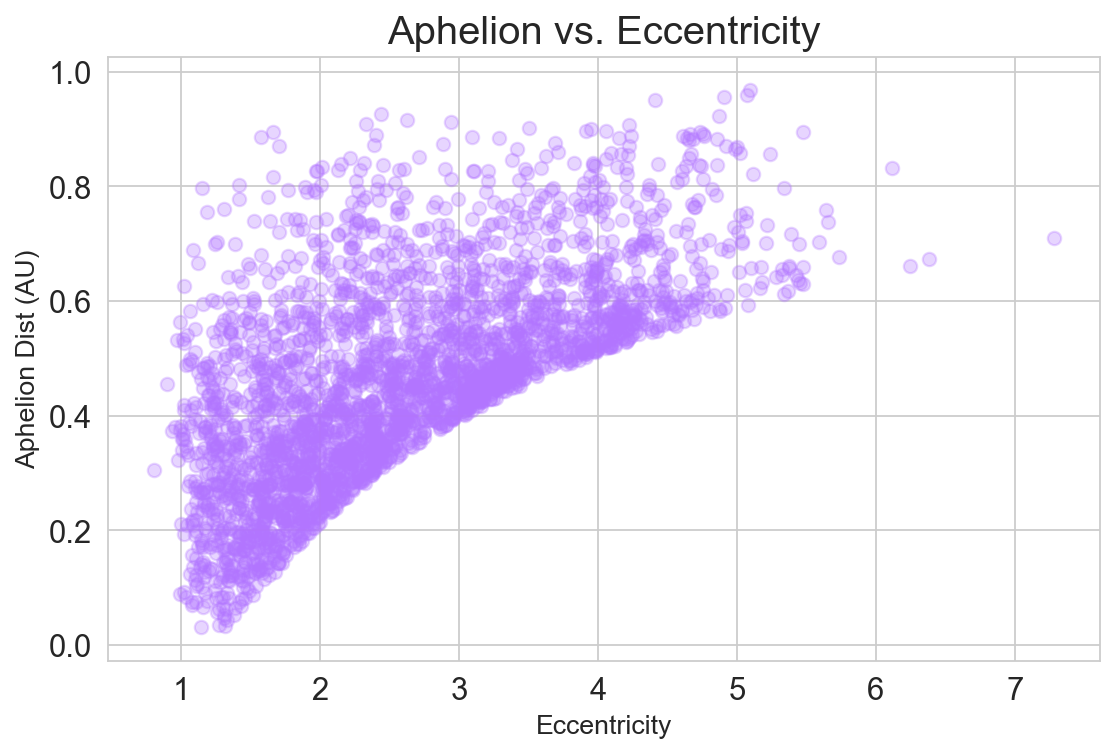

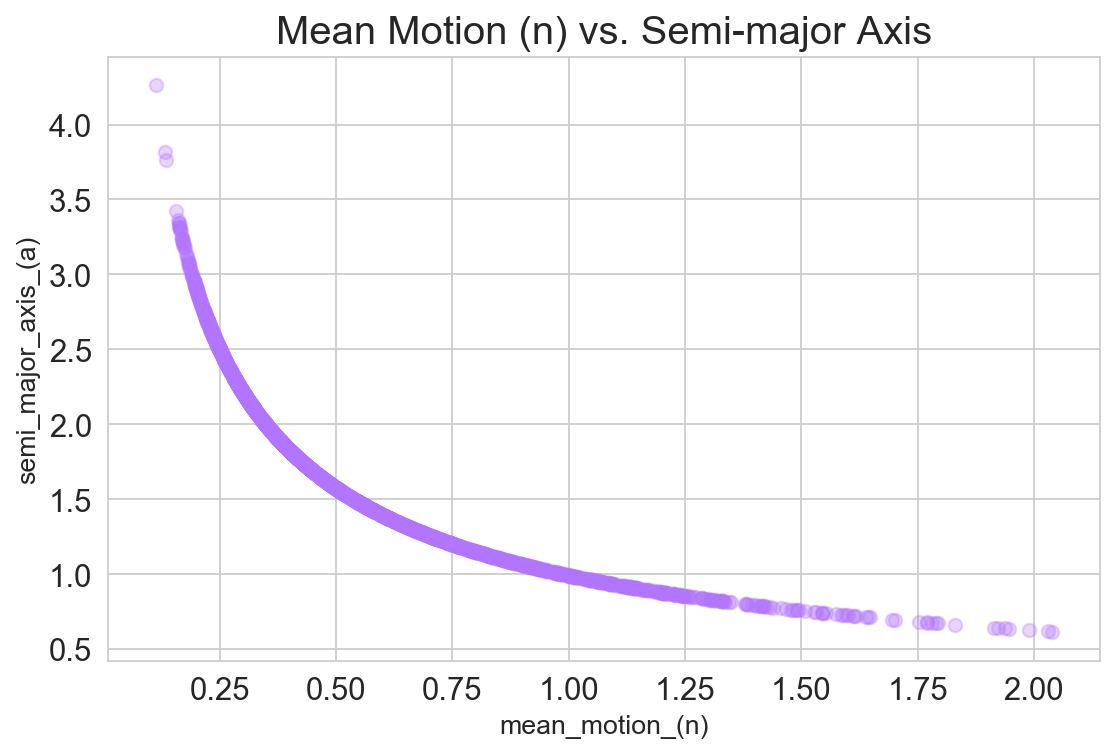

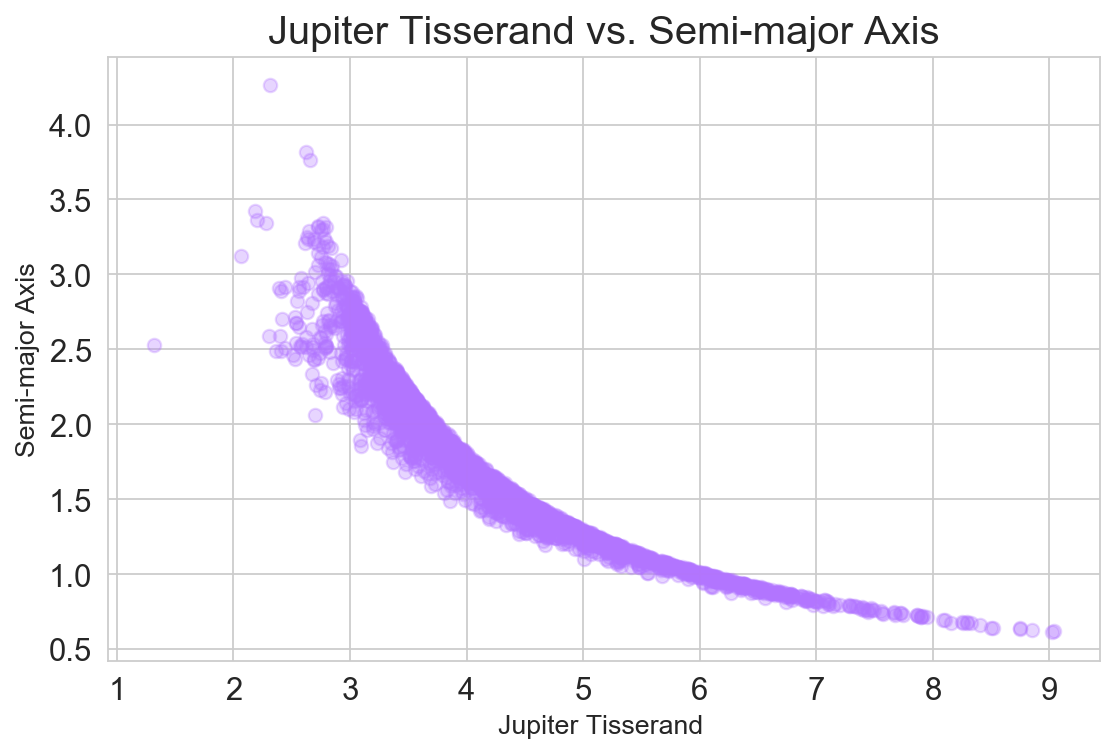

In [63]:
def plot_scatterplot(dataframe, list_of_columns, title, xlabel, ylabel):
    plt.figure(figsize=(8, 5), dpi=80)
    plt.scatter(dataframe[list_of_columns[0]],
            dataframe[list_of_columns[1]], c=c[0], alpha=0.3)
    plt.title(title, fontsize=18)
    plt.xlabel(xlabel, fontsize = 12)
    plt.ylabel(ylabel, fontsize=12);

plot_scatterplot(df, ['aphelion_dist_(Q)', 'semi_major_axis_(a)'], 
                 'Aphelion vs. Semi-major Axis',
                'Aphelion Dist (AU)', 'Semi-major Axis (AU)')

plot_scatterplot(df, ['semi_major_axis_(a)', 'eccentricity_(e)'], 
                 'Eccentricity vs. Semi-major Axis', 
                 'Semi-major Axis (AU)', 'Eccentricity')

plot_scatterplot(df, ['aphelion_dist_(Q)', 'eccentricity_(e)'], 
                 'Aphelion vs. Eccentricity', 
                 'Eccentricity', 'Aphelion Dist (AU)')


plot_scatterplot(df, ['mean_motion_(n)', 'semi_major_axis_(a)'], 
                 'Mean Motion (n) vs. Semi-major Axis', 
                 'mean_motion_(n)', 'semi_major_axis_(a)')

plot_scatterplot(df, ['t_jupiter', 'semi_major_axis_(a)'], 
                 'Jupiter Tisserand vs. Semi-major Axis', 
                 'Jupiter Tisserand ', 'Semi-major Axis');

**Scatter Plots Interpretation**
>The "Aphelion vs Semi-major Axis" scatter plots have a very high correlation (.97) – closely linear scatter plot – which is not surprising since the aphelion distance is $a(1+e)$, where $a$ is the semi-major axis and $e$ is the eccentricity. Eccentricity is the ratio of half the distance between the foci c to the semi-major axis `a: e=c/a`. For example, an orbit with $e$ between 0 and 1 is elliptic. The plot above shows that all the observations have elliptical orbits because eccentricity is between 0 and 1.Without loss of generality, the relationships between "Eccentricity vs. Semi-major Axis" and "Eccentricity', 'Aphelion Dist (AU)" can also be explained. The "Mean Motion vs. Semi-major Axis" scatter plot demonstrates an exponential decay relationship because the mean motion is the angular speed and is calculated by 2π/orbital period and orbital period is determined by the semi-major axis.

\begin{equation}
T_J = \frac{a_J}{a} + 2 \left[(1 - e^2)\frac{a}{a_J}\right]^{1/2} \cos(i)
\end{equation}

Is there a difference in mean orbital periods of hazardous and non-hazardous asteroids?

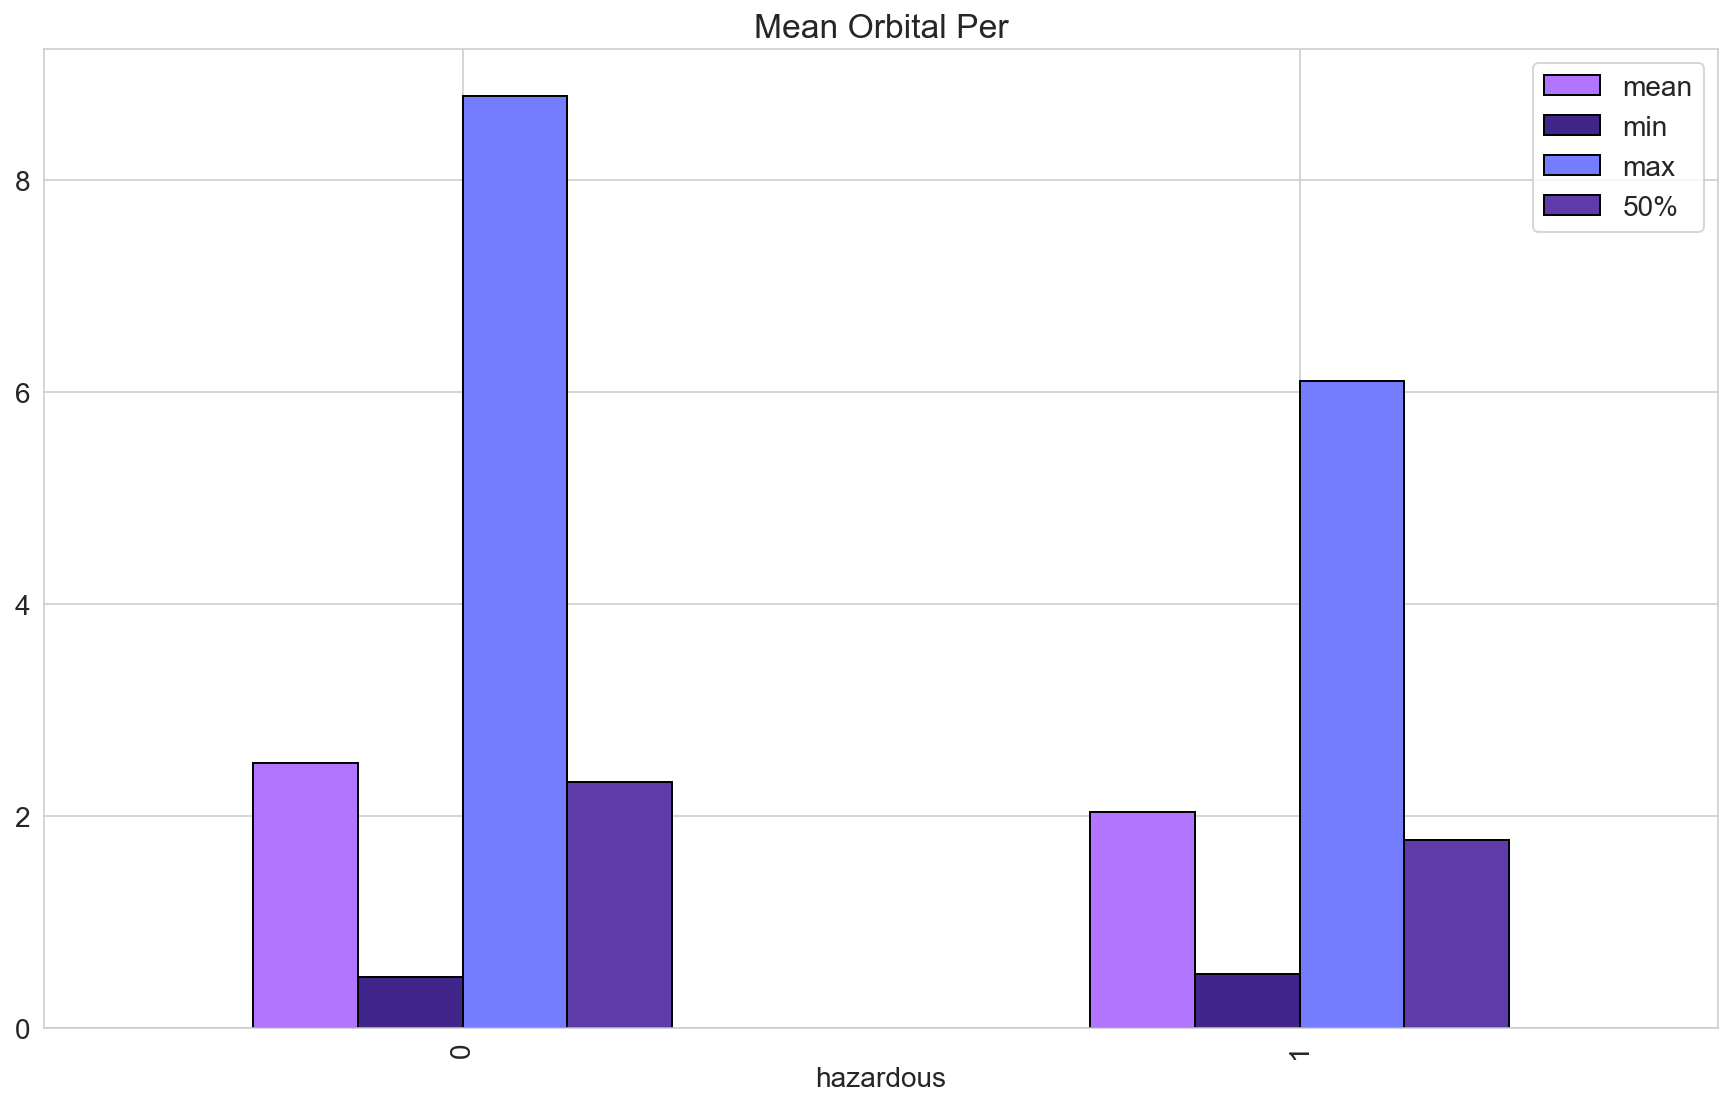

In [64]:
df.groupby('hazardous')['orbital_per_(y)'].describe()[['mean', 'min', 'max', '50%']].plot(kind='bar', color=[c[0], c[4], c[1], c[2]], ec='k')

plt.title('Mean Orbital Per');

### Potentially Hazardous Asteroids Over Time

How have PHA observations changed over time?  

>I created two different data frame copies that use the datetime columns as the indices. The original data frame contains a `last_obs` column that states the date each observation was last observed and a `first_obs` column that states the discovery date of each observation. `df1` uses `first_obs` as the index and `last_obs` uses `df2` as the index. 

In [65]:
# Make copy of df to set first observed as index
df1 = df.copy()
df1.set_index('first_obs', inplace=True)

# Make copy of df to set last observed as index
df2 = df.copy()
df2.set_index('last_obs', inplace=True)

# df1['hazardous'].resample('Y').sum().plot(grid=False, color=c[2]);
# df2['hazardous'].resample('Y').sum().plot(grid=False, color=c[2]);

**The number of hazardous asteroids discovered over time.**
>There are 125 years to observe so it would help if I narrow down the years.

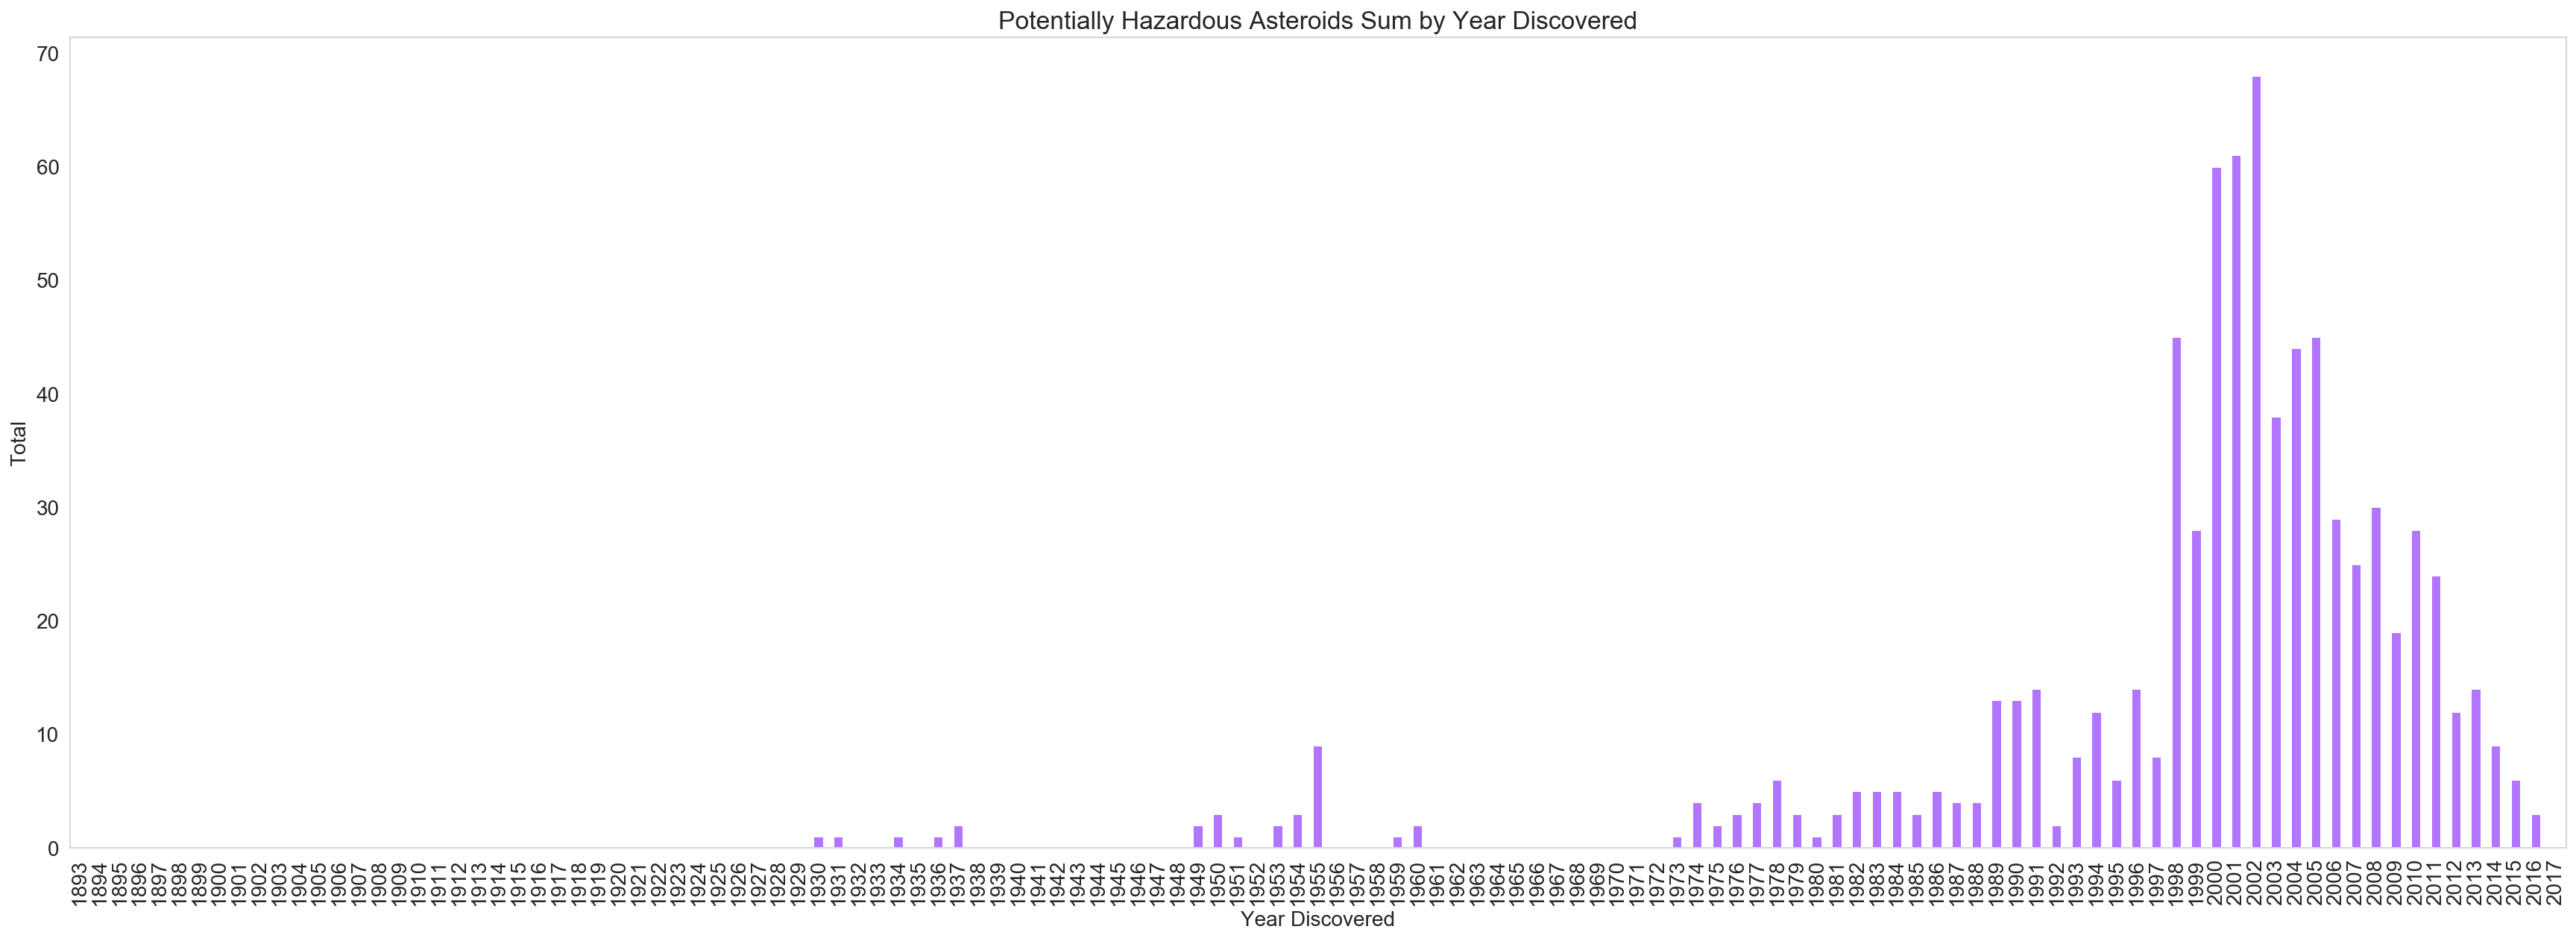

In [66]:
# Plot all of the PHAs over time

haz_labels = df1['hazardous'].resample('Y').sum().index.year.values

plt.figure(figsize=(30,10))
df1['hazardous'].resample('Y').sum().plot(kind='bar', grid=False, color=c[0])
plt.title('Potentially Hazardous Asteroids Sum by Year Discovered')
plt.ylabel('Total')
plt.xlabel('Year Discovered')
plt.xticks(ticks = np.arange(125), labels=haz_labels);
plt.savefig('../images/PHA_first_obs.png');

**The number of hazardous asteroids discovered over the last 30 years.**
>The distribution start off with a lower count, probably because measuring tools were not as advanced, and increases significantly in the late 90's/early 2000's. The peak is in 2002 and lowers gradually until the latest discoveries in 2017.

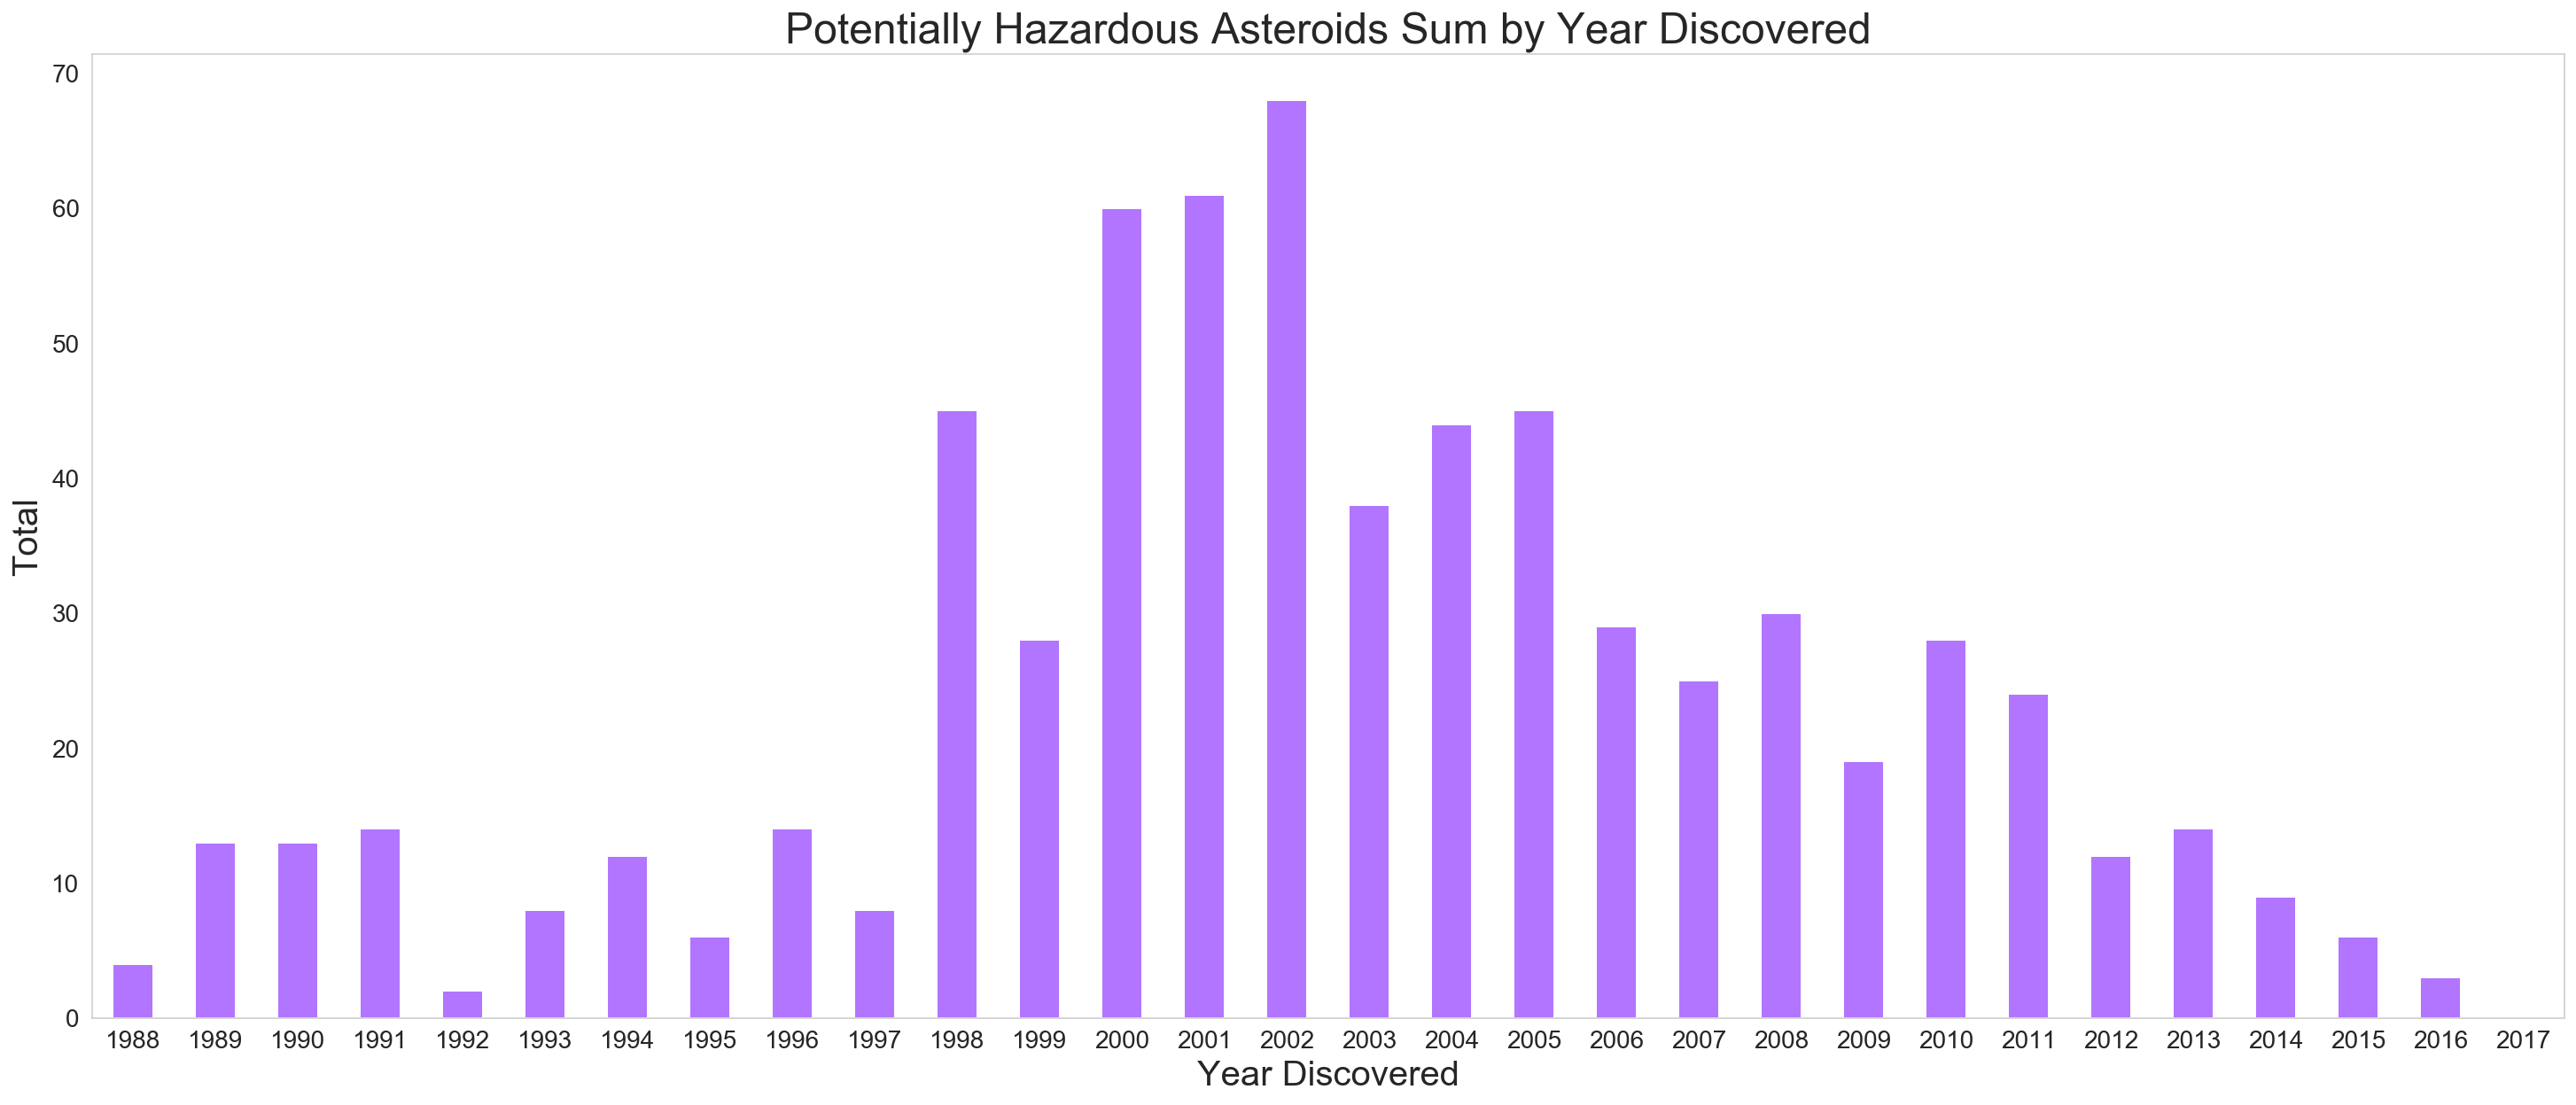

In [67]:
# Plot the number of hazardous asteroids first observed over the last 30 years

labels1 = df1['hazardous'].sort_values().resample('Y').sum().tail(30).index.year.values

plt.figure(figsize=(25,10))
df1['hazardous'].sort_values().resample('Y').sum().tail(30).plot(kind='bar', grid=False, color=c[0])
plt.title('Potentially Hazardous Asteroids Sum by Year Discovered', fontsize=24)
plt.ylabel('Total', fontsize=20)
plt.xlabel('Year Discovered', fontsize=20)
plt.xticks(ticks = np.arange(30), labels=labels1, rotation = 'horizontal');
plt.savefig('../images/hazardous_discovery.png');

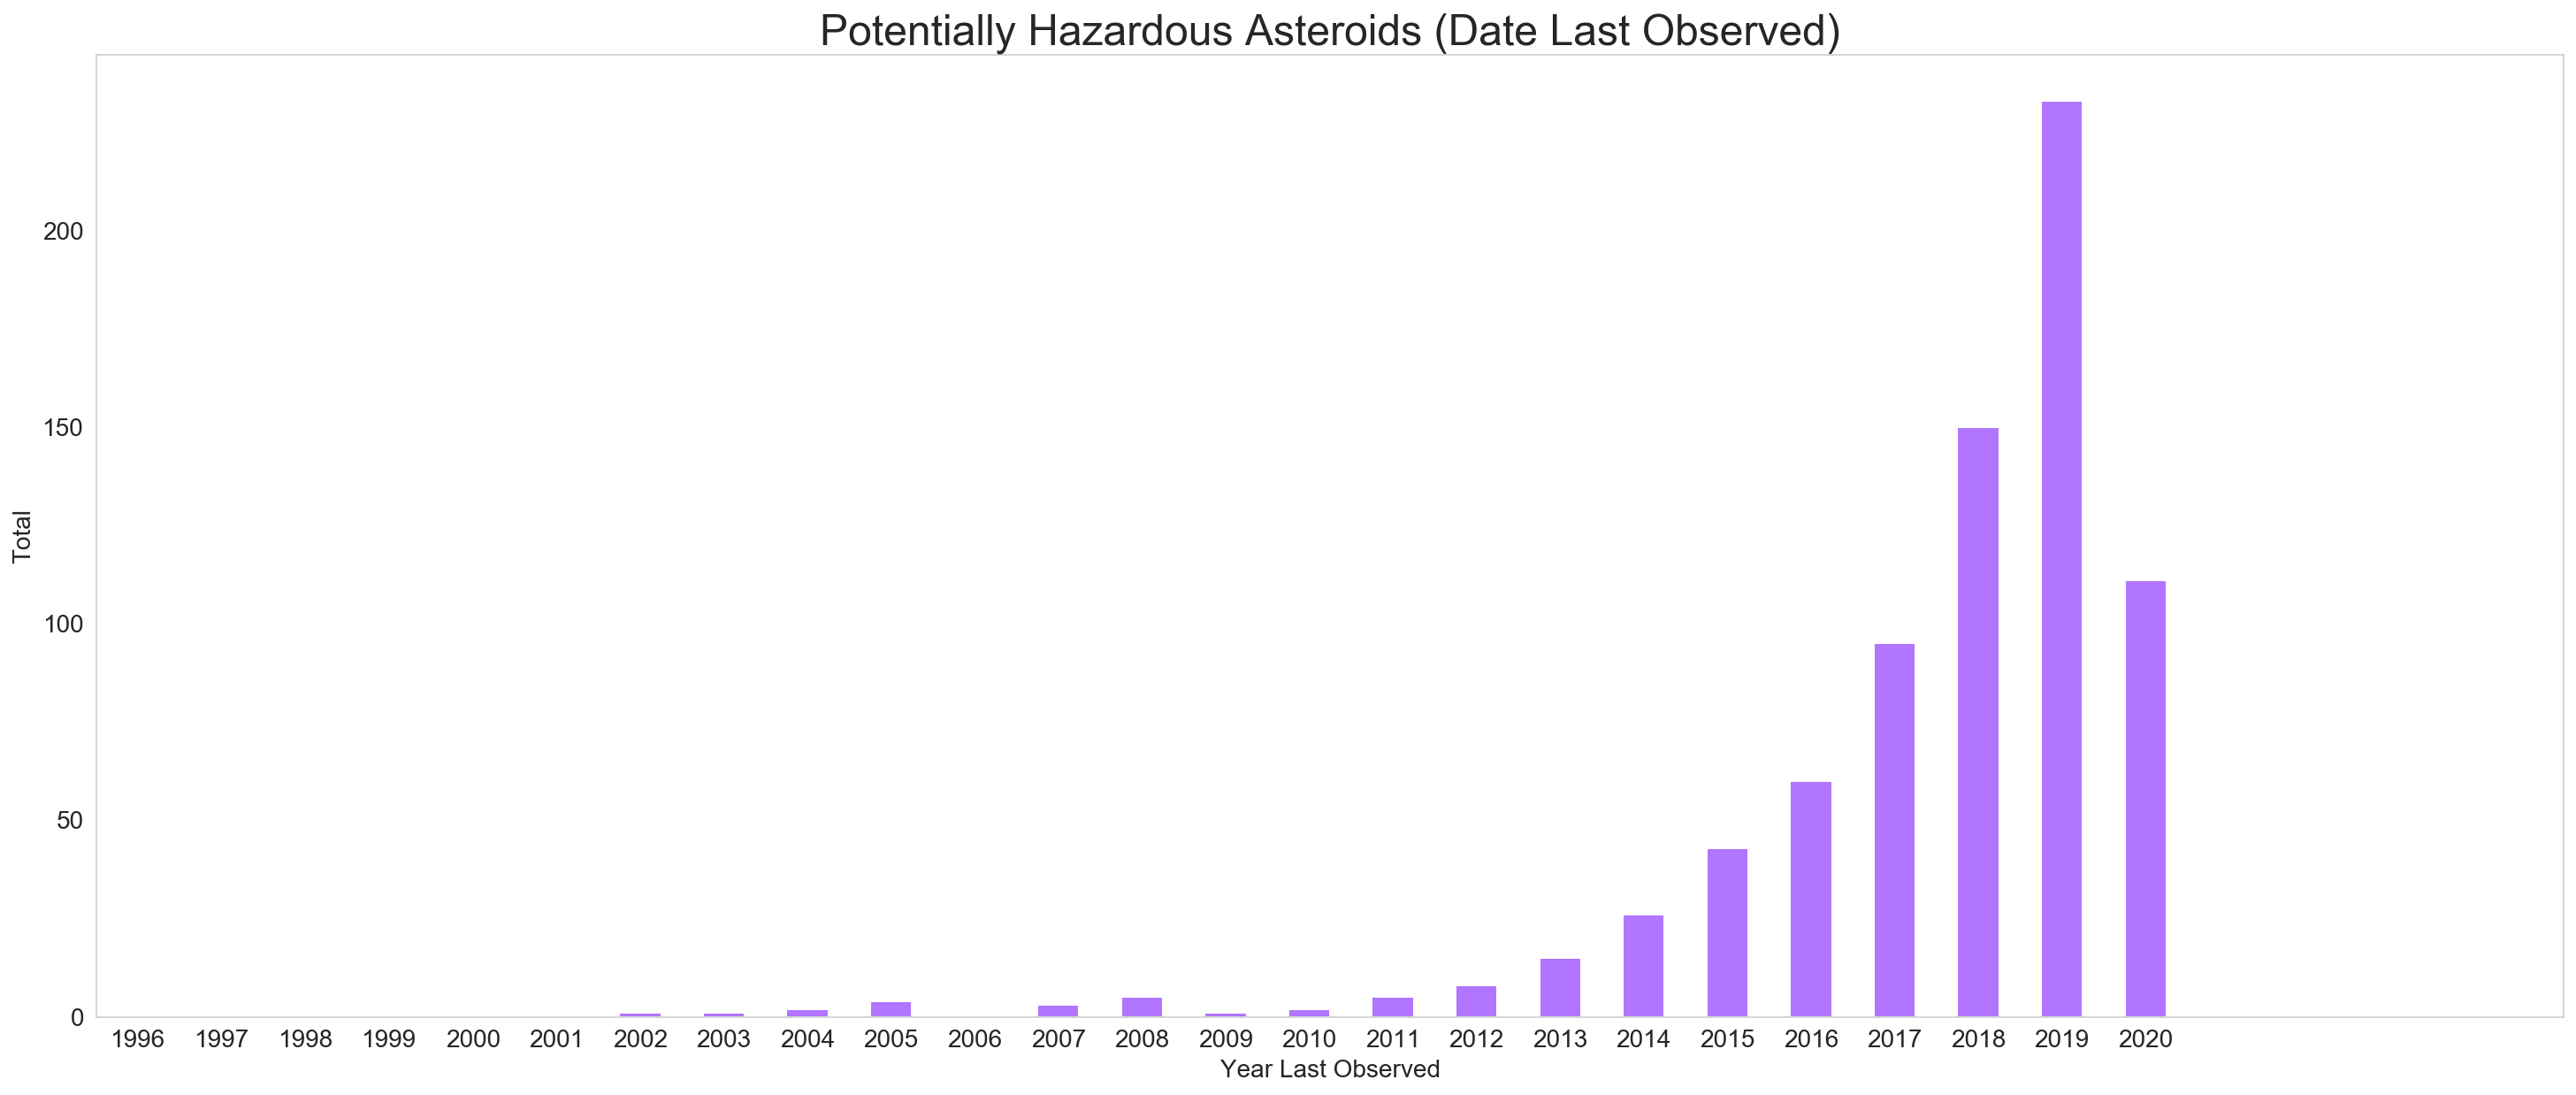

In [68]:
# Plot all of the last observed PHAs over time

labels2 = df2['hazardous'].resample('Y').sum().index.year.values

plt.figure(figsize=(25,10))
df2['hazardous'].resample('Y').sum().plot(kind='bar', grid=False, color=c[0])
plt.title('Potentially Hazardous Asteroids (Date Last Observed)', fontsize=24)
plt.ylabel('Total')
plt.xlabel('Year Last Observed')
plt.xticks(ticks = np.arange(30), labels=labels2, rotation = 'horizontal');
plt.savefig('../images/PHA_last_obs.png');

### Finding Standard Gravitational Parameter to Find Velocity
---

"The Standard Gravitational Parameter μ of a celestial body is the product of the gravitational constant G and the mass M of the body." [[source]](https://en.wikipedia.org/wiki/Standard_gravitational_parameter)

**Formula:**  

${\mu =GM}$  

"The central body in an orbital system can be defined as the one whose mass (M) is much larger than the mass of the orbiting body (m). This approximation is standard for planets orbiting the Sun or most moons and greatly simplifies equations. Under Newton's law of universal gravitation, if the distance between the bodies is r, the force exerted on the smaller body is:"  

${F={\frac {GMm}{r^{2}}}={\frac {\mu m}{r^{2}}}}$

"This can be generalized for elliptic orbits:"  

$\mu = \frac{4\pi^2a^3}{T^2}$

---

Defines a function that takes the inputs $a$ (the semi-major axis) and $T$ (the orbital period in years) to find the standard gravitational parameter – using the equation above.

In [69]:
import math
# Function to calculate standard gravitational parameter in order 
# to find the relative velocity of an asteroid given the semi-major axis and the orbital period
# result will be in au/yr

def stand_grav_param(a, T, df):
    stand_grav_param_list = []
    for i in a:
        for t in T:
            stand_grav_param = (4 * (math.pi**2) * (i**3)) / (t**2)
        stand_grav_param_list.append(stand_grav_param)
    df['stand_grav_param'] = stand_grav_param_list
    return df['stand_grav_param']

# Calculate standard param for semimajor axis and orbital year
stand_grav_param(df['semi_major_axis_(a)'], df['orbital_per_(y)'], df)

0       13.866566
1       82.182090
2       67.719856
3       84.647180
4       31.638696
          ...    
2912    15.126618
2913     4.966050
2914     4.611972
2915    43.686169
2916    39.476926
Name: stand_grav_param, Length: 2917, dtype: float64

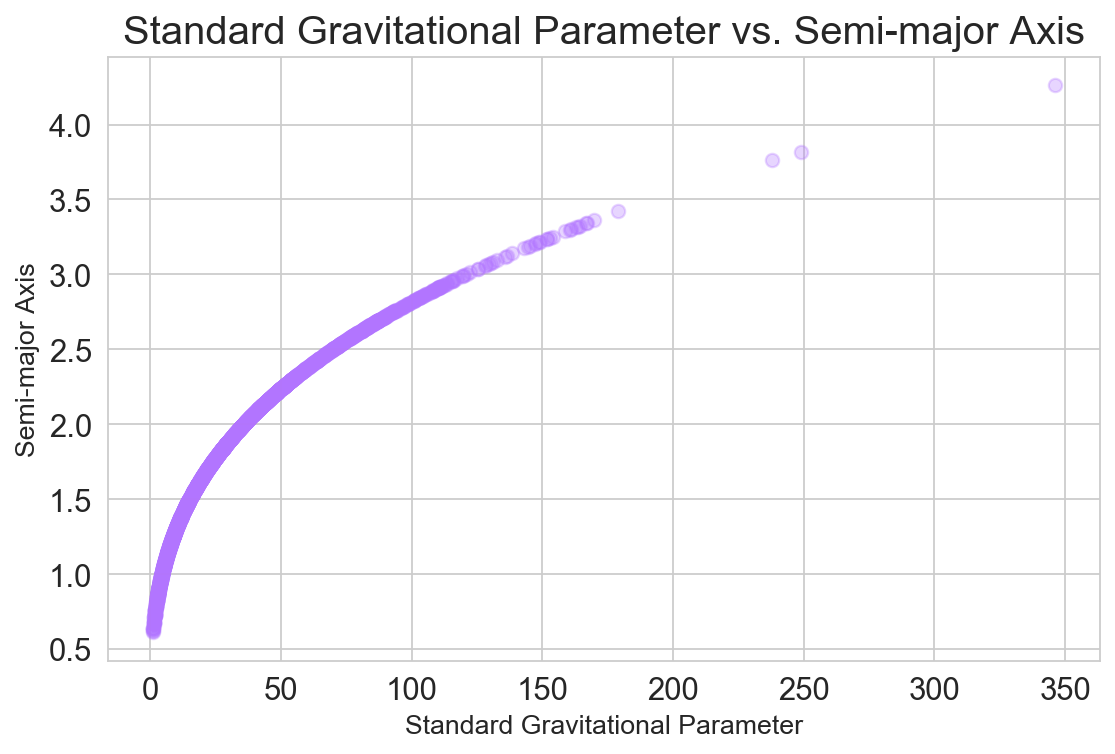

In [70]:
plot_scatterplot(df, ['stand_grav_param', 'semi_major_axis_(a)'], 'Standard Gravitational Parameter vs. Semi-major Axis', 'Standard Gravitational Parameter', 'Semi-major Axis');


Text(0.5, 1.0, 'Standard Gravitational Parameter Distribution')

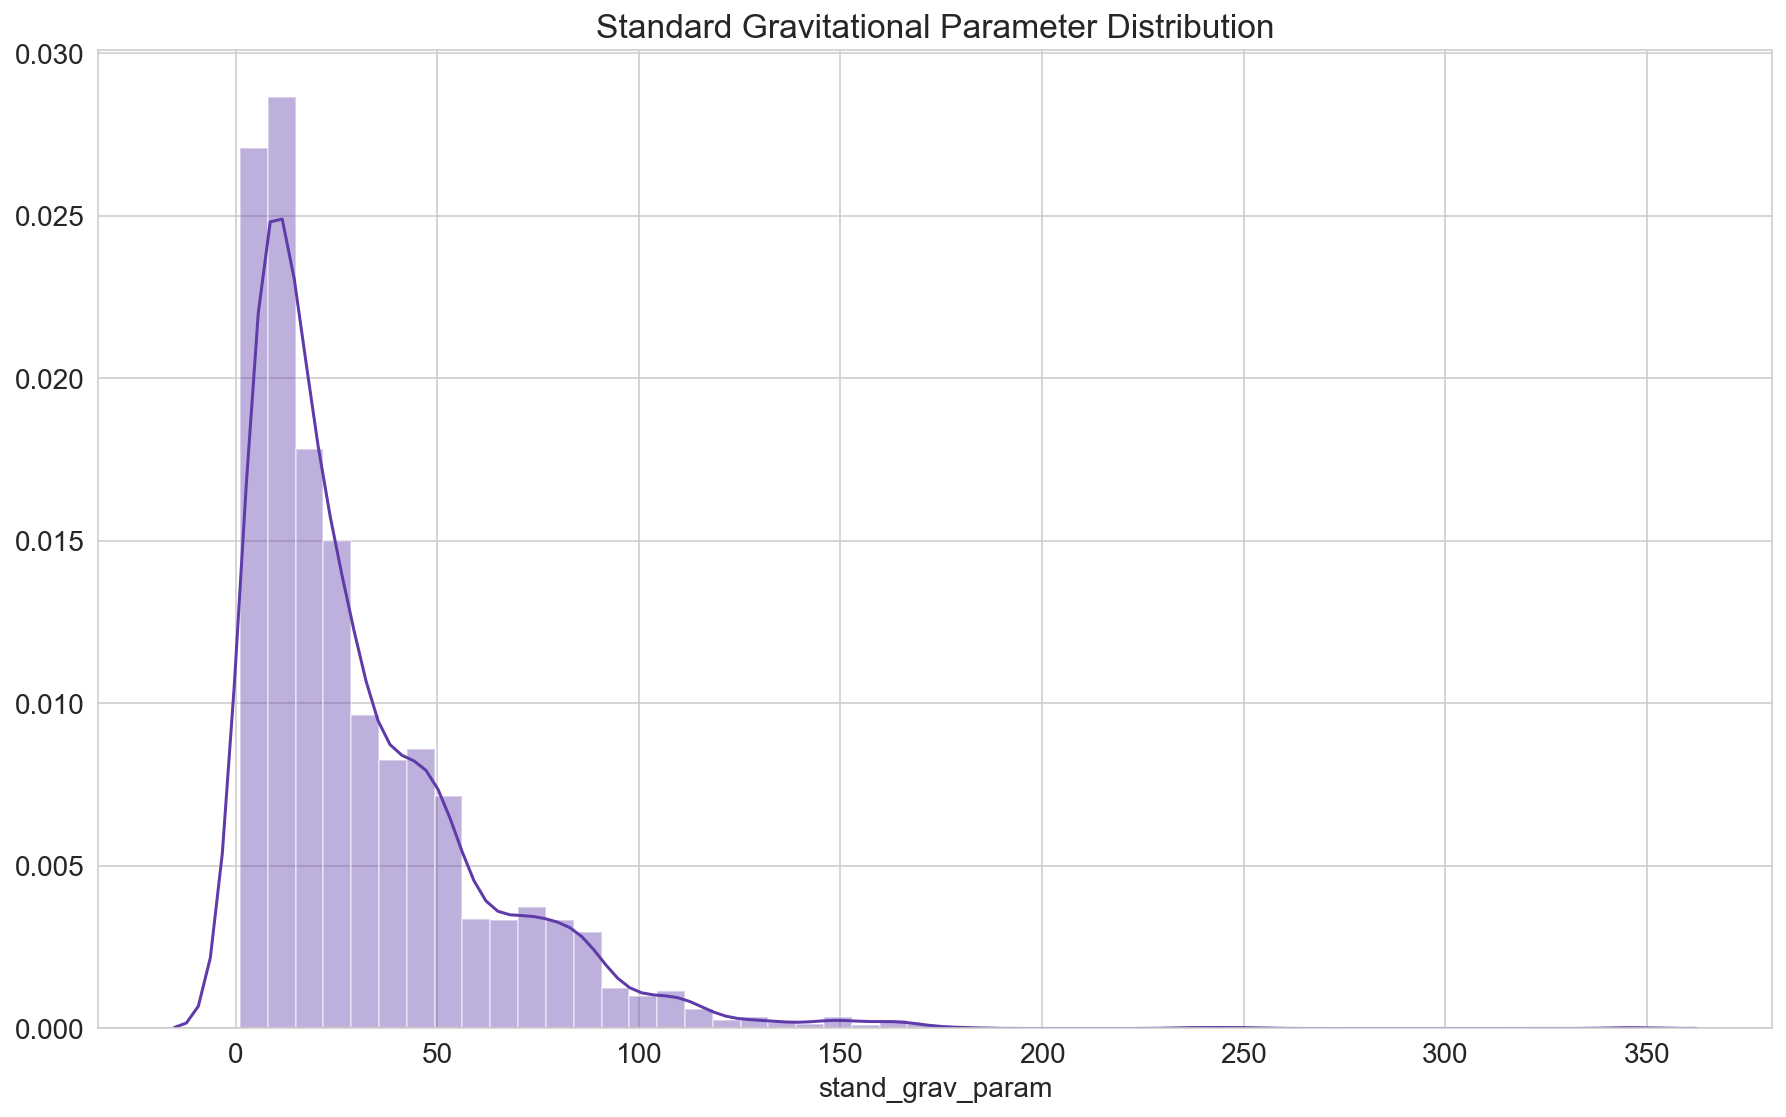

In [71]:
# View a quick distribution
sns.distplot(df['stand_grav_param'], color=c[2])
plt.title('Standard Gravitational Parameter Distribution')

### Finding Instantaneous Orbit Velocity

---
After finding the standard gravitational constant, I can use that to finally find the velocity using the formula below.  

**Formula:**  
$v$ = $\mu\sqrt{{\frac{2}{r}}-{\frac{1}{a}}}$


Create function that will take the $r$ (the orbital distance from the sun), $a$ (the semi-major axis), and `stand_grav_param` (the standard gravitational parameter calculated above).

In [72]:
# Create a function to calculate the instantaneous velocity
# Result in AU/year

def calc_velocity(r, a, stand_grav_param):
    velocity = (stand_grav_param * ((2/r) - (1/a)))**.5
    return velocity

In [73]:
# Apply the function to find the velocity given the semimajor axis and the farthest distance from the Sun
df['rel_velocity_Q'] = calc_velocity(df['aphelion_dist_(Q)'], df['semi_major_axis_(a)'], df['stand_grav_param'])

# Apply the function to find the velocity given the semimajor axis and the closest distance from the Sun
df['rel_velocity_q'] = calc_velocity(df['perihelion_dist_(q)'], df['semi_major_axis_(a)'], df['stand_grav_param'])

# Current units AU/yr
# Convert to km/sec
df['rel_velocity_Q'] = df['rel_velocity_Q'] * 4.74372
df['rel_velocity_q'] = df['rel_velocity_q'] * 4.74372

In [74]:
df.head()

hazardous   epoch_cal  eccentricity_(e)  semi_major_axis_(a)  \
0          0  20200531.0          0.222951             1.458046   
1          0  20200531.0          0.546558             2.638602   
2          0  20200531.0          0.570332             2.473737   
3          0  20200531.0          0.533046             2.664725   
4          0  20200531.0          0.435285             1.919498   

   perihelion_dist_(q)  inclination_(i)  perihelion_arg_(w)  \
0             1.132973        10.830543          178.882294   
1             1.196452        11.567485          156.176338   
2             1.062886         9.393854          350.495585   
3             1.244303        26.677643          132.364631   
4             1.083970        11.876536           26.694797   

   abs_magnitude_(H)  mean_anomaly  aphelion_dist_(Q)  ...  \
0               10.4    271.071732           1.783119  ...   
1               15.4    140.273422           4.080752  ...   
2               13.8    294.579157           3.884588  ...   
3                9.4      4.817745           4.085146  ...   
4               17.7     38.522409           2.755027  ...   

   asc_node_long_(deg)  orbital_per_(y)  first_obs   last_obs  class_APO  \
0           304.299327         1.760617 1893-10-29 2019-02-13          0   
1           183.866950         4.286167 1911-10-04 2020-02-27          0   
2           110.434218         3.890796 1918-02-03 2019-08-27          0   
3           215.546826         4.349974 1924-10-23 2019-08-17          0   
4           171.326998         2.659437 1932-03-12 2020-01-24          0   

  class_ATE class_IEO  stand_grav_param  rel_velocity_Q  rel_velocity_q  
0         0         0         13.866566       11.661046       18.352633  
1         0         0         82.182090       14.335015       48.892609  
2         0         0         67.719856       12.982886       47.449251  
3         0         0         84.647180       14.755655       48.443972  
4         0         0         31.638696       12.080367       30.703567  

[5 rows x 23 columns]

Compares the distribution between the relative orbital velocity from the **aphelion distance** (the farthest distance to the sun) and the **perihelion distance** (the closest distance to the sun).

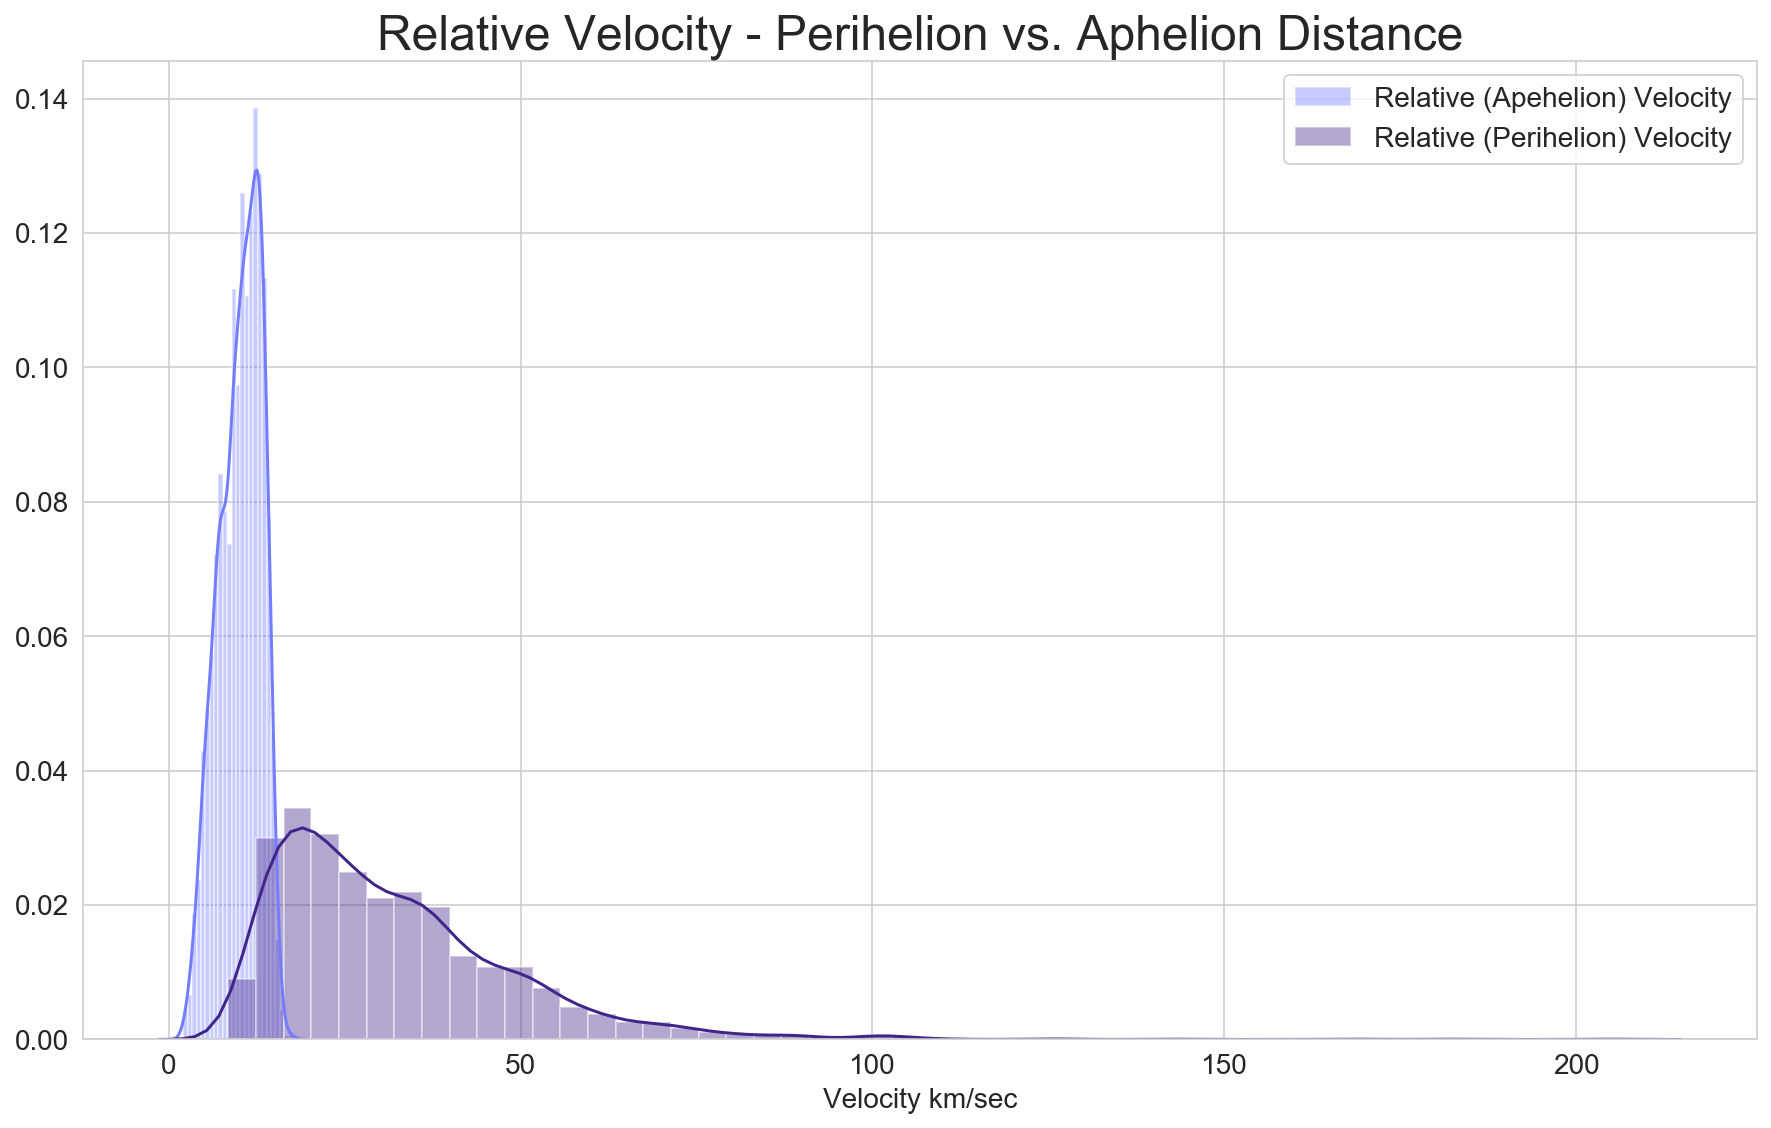

In [75]:
sns.distplot(df['rel_velocity_Q'], color=c[1])
sns.distplot(df['rel_velocity_q'], color=c[4]);
plt.title('Relative Velocity - Perihelion vs. Aphelion Distance', fontsize=24)
plt.xlabel('Velocity km/sec')
# plt.ylabel(f'Frequency x {10**4}')
plt.legend(['Relative (Apehelion) Velocity', 'Relative (Perihelion) Velocity'], fontsize =14);
plt.savefig('../images/relative_velocity.png');

In [76]:
df['rel_velocity_Q'].describe()

count    2917.000000
mean       10.223532
std         2.941185
min         2.066715
25%         8.017957
50%        10.594834
75%        12.583321
max        17.641962
Name: rel_velocity_Q, dtype: float64

In [77]:
df['rel_velocity_q'].describe()

count    2917.000000
mean       31.805156
std        17.251645
min         8.468290
25%        19.055314
50%        27.858606
75%        39.748586
max       204.995086
Name: rel_velocity_q, dtype: float64

In [78]:
df.dtypes

hazardous                               int64
epoch_cal                             float64
eccentricity_(e)                      float64
semi_major_axis_(a)                   float64
perihelion_dist_(q)                   float64
inclination_(i)                       float64
perihelion_arg_(w)                    float64
abs_magnitude_(H)                     float64
mean_anomaly                          float64
aphelion_dist_(Q)                     float64
mean_motion_(n)                       float64
min_orbit_intersection_dist           float64
t_jupiter                             float64
asc_node_long_(deg)                   float64
orbital_per_(y)                       float64
first_obs                      datetime64[ns]
last_obs                       datetime64[ns]
class_APO                               uint8
class_ATE                               uint8
class_IEO                               uint8
stand_grav_param                      float64
rel_velocity_Q                    

In [79]:
df.isnull().sum()

hazardous                      0
epoch_cal                      0
eccentricity_(e)               0
semi_major_axis_(a)            0
perihelion_dist_(q)            0
inclination_(i)                0
perihelion_arg_(w)             0
abs_magnitude_(H)              0
mean_anomaly                   0
aphelion_dist_(Q)              0
mean_motion_(n)                0
min_orbit_intersection_dist    0
t_jupiter                      0
asc_node_long_(deg)            0
orbital_per_(y)                0
first_obs                      0
last_obs                       0
class_APO                      0
class_ATE                      0
class_IEO                      0
stand_grav_param               0
rel_velocity_Q                 0
rel_velocity_q                 0
dtype: int64

Text(0.5, 1.0, 'Epoch Distribution (Unique Values)')

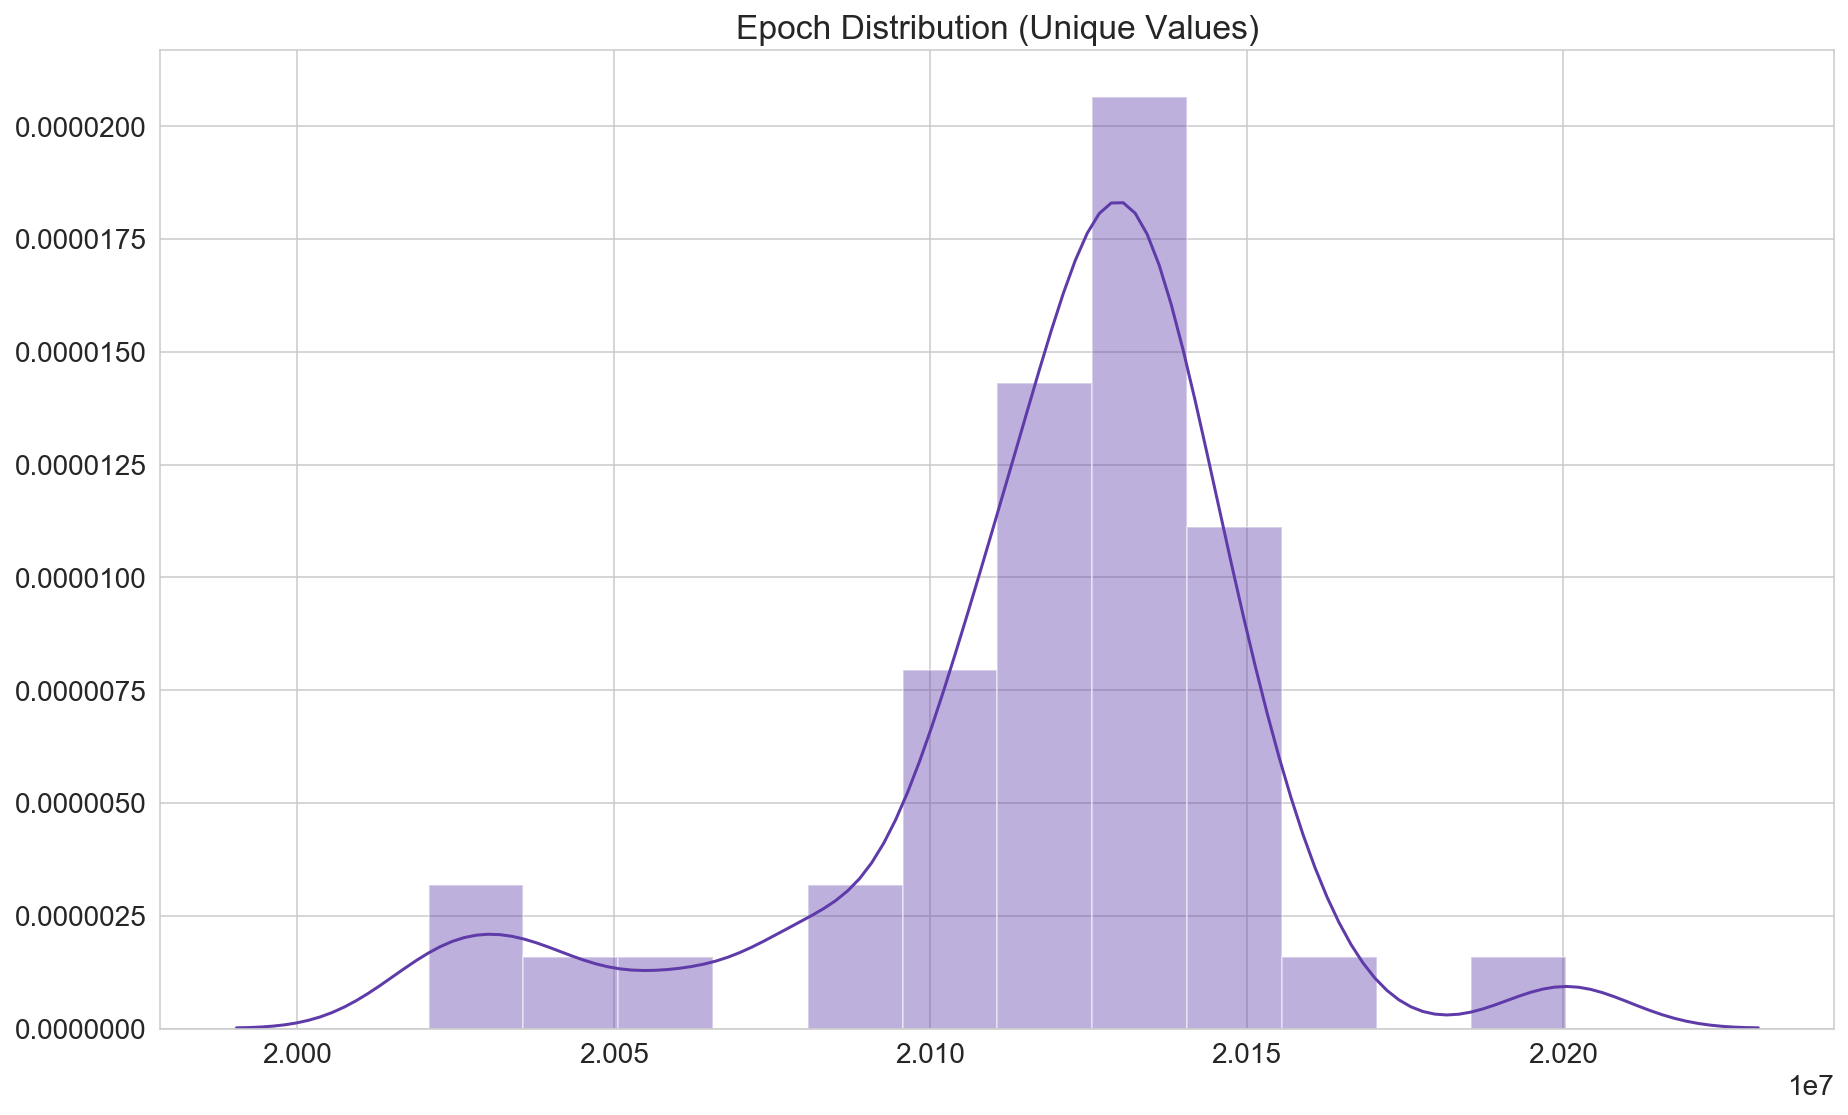

In [80]:
sns.distplot(df['epoch_cal'].unique(), color=c[2])
plt.title('Epoch Distribution (Unique Values)')

In [81]:
# df['first_obs'].hist(bins=50, color=c[0])

# df['last_obs'].hist(bins=50, color=c[0])

### Unbalanced Target Classes

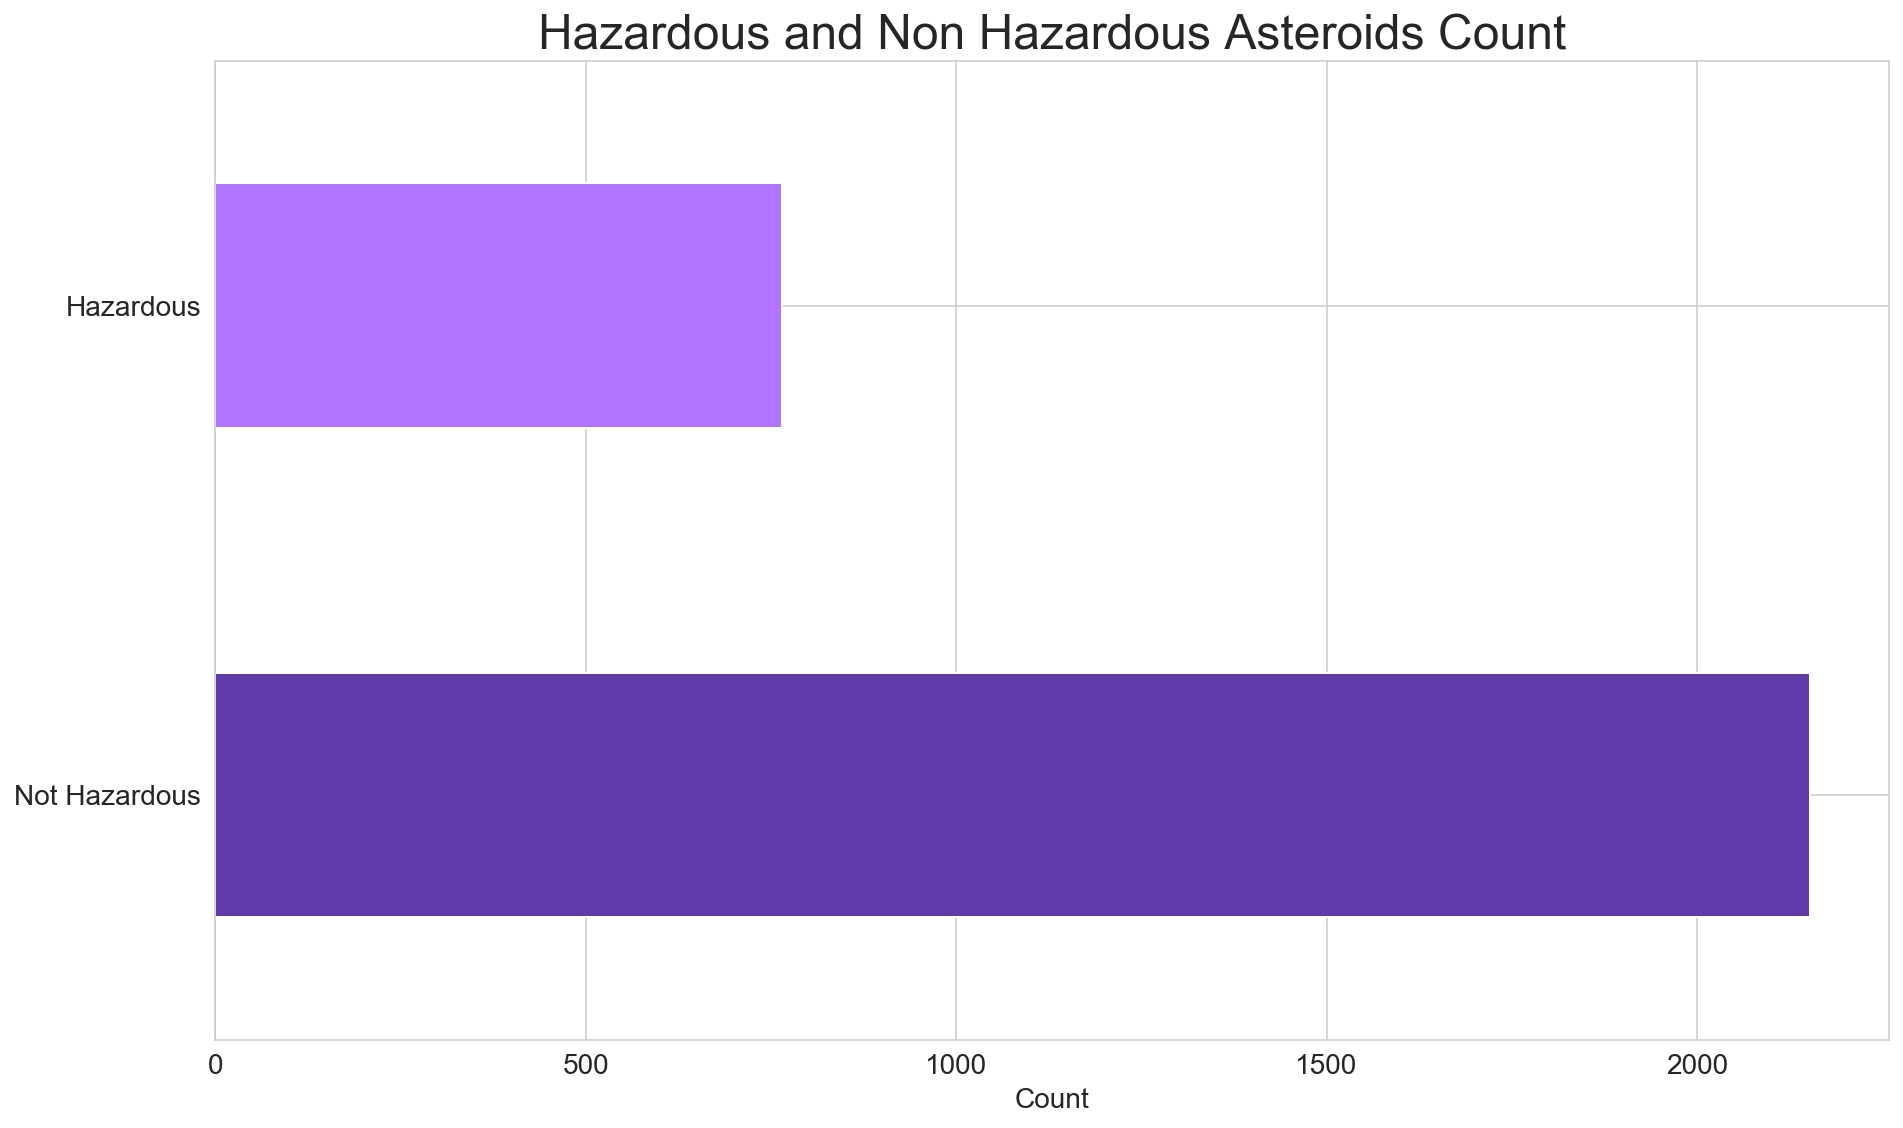

In [82]:
df['hazardous'].value_counts().plot(kind='barh', color=[c[2], c[0]])
plt.yticks(ticks = np.arange(2), labels=['Not Hazardous', 'Hazardous']);
plt.title('Hazardous and Non Hazardous Asteroids Count', size=24);
plt.xlabel('Count')
plt.savefig('../images/class_count.png');

### Pickle Cleaned Data

In [83]:
import pickle

pickle.dump(df, open("../assets/clean_df.pkl", "wb"))